In [ ]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Work through the notebook

In [ ]:
# Python Imports
import math
import time
import scipy
import datetime
import psutil
import random

# Data Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import euclidean_distances

from statistics import mean

In [ ]:
sns.set_style("whitegrid")

Loading the data

In [ ]:
#import df
df = pd.read_csv("/gdrive/My Drive/sensor_data/03-06/front area/front_area.csv")
df

,Time,22_Temp,22_humidity,22_M1,21_Temp,21_humidity,21_M2,21_M1,20_Temp,20_humidity,20_M2,20_M1,number of people,Type of crowd,weather,schedule,day_Time
11:26:46,28.200001,85.900002,1.0,27.5,99.900002,0.0,0.0,27.900000,1.0,0,0,2,flow,windy,meeting,morning,
11:26:47,28.200001,85.900002,0.0,27.5,99.900002,0.0,0.0,28.000000,1.0,0,0,2,flow,windy,meeting,morning,
11:26:48,28.200001,85.900002,1.0,27.5,99.900002,0.0,1.0,28.000000,1.0,1,0,2,flow,windy,meeting,morning,
11:26:49,28.200001,85.900002,0.0,27.5,99.900002,0.0,1.0,28.000000,1.0,1,0,2,flow,windy,meeting,morning,
11:26:50,28.200001,85.900002,1.0,27.5,99.900002,0.0,0.0,28.000000,1.0,1,1,2,flow,windy,meeting,morning,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12:58:34,28.200001,86.300003,1.0,27.0,99.900002,0.0,0.0,27.200001,1.0,0,0,3,flow,windy,meeting,afternoon,
12:58:35,28.200001,86.300003,1.0,27.0,99.900002,0.0,0.0,27.200001,1.0,0,0,3,flow,windy,meeting,afternoon,
12:58:36,28.200001,86.300003,0.0,27.0,99.900002,0.0,0.0,27.200001,1.0,0,0,3,flow,windy,meeting,afternoon,
12:58:37,28.200001,86.400002,0.0,27.0,99.900002,0.0,0.0,27.200001,1.0,0,0,3,flow,windy,meeting,afternoon,


In [ ]:
# Converting index to column 'index'
df.reset_index(level = 0, inplace = True)
print(df.head())

      index       Time    22_Temp  22_humidity  22_M1    21_Temp  21_humidity  \
0  11:26:46  28.200001  85.900002          1.0   27.5  99.900002          0.0   
1  11:26:47  28.200001  85.900002          0.0   27.5  99.900002          0.0   
2  11:26:48  28.200001  85.900002          1.0   27.5  99.900002          0.0   
3  11:26:49  28.200001  85.900002          0.0   27.5  99.900002          0.0   
4  11:26:50  28.200001  85.900002          1.0   27.5  99.900002          0.0   

   21_M2  21_M1  20_Temp  20_humidity 20_M2 20_M1 number of people  \
0    0.0   27.9      1.0            0     0     2             flow   
1    0.0   28.0      1.0            0     0     2             flow   
2    1.0   28.0      1.0            1     0     2             flow   
3    1.0   28.0      1.0            1     0     2             flow   
4    0.0   28.0      1.0            1     1     2             flow   

  Type of crowd   weather  schedule day_Time  
0         windy   meeting   morning          

In [ ]:
# Shifting columns by one period to the right
df = df.shift(periods = 1, axis=1)
print(df.head())

  index      Time    22_Temp  22_humidity  22_M1  21_Temp  21_humidity  21_M2  \
0   NaN  11:26:46  28.200001    85.900002    1.0     27.5    99.900002    0.0   
1   NaN  11:26:47  28.200001    85.900002    0.0     27.5    99.900002    0.0   
2   NaN  11:26:48  28.200001    85.900002    1.0     27.5    99.900002    0.0   
3   NaN  11:26:49  28.200001    85.900002    0.0     27.5    99.900002    0.0   
4   NaN  11:26:50  28.200001    85.900002    1.0     27.5    99.900002    0.0   

   21_M1  20_Temp  20_humidity  20_M2 20_M1 number of people Type of crowd  \
0    0.0     27.9          1.0      0     0                2          flow   
1    0.0     28.0          1.0      0     0                2          flow   
2    1.0     28.0          1.0      1     0                2          flow   
3    1.0     28.0          1.0      1     0                2          flow   
4    0.0     28.0          1.0      1     1                2          flow   

  weather  schedule  day_Time  
0   windy   

In [ ]:
# Deleting the 'index' column
df.drop("index", inplace=True, axis=1)
print(df.head())

       Time    22_Temp  22_humidity  22_M1  21_Temp  21_humidity  21_M2  \
0  11:26:46  28.200001    85.900002    1.0     27.5    99.900002    0.0   
1  11:26:47  28.200001    85.900002    0.0     27.5    99.900002    0.0   
2  11:26:48  28.200001    85.900002    1.0     27.5    99.900002    0.0   
3  11:26:49  28.200001    85.900002    0.0     27.5    99.900002    0.0   
4  11:26:50  28.200001    85.900002    1.0     27.5    99.900002    0.0   

   21_M1  20_Temp  20_humidity  20_M2 20_M1 number of people Type of crowd  \
0    0.0     27.9          1.0      0     0                2          flow   
1    0.0     28.0          1.0      0     0                2          flow   
2    1.0     28.0          1.0      1     0                2          flow   
3    1.0     28.0          1.0      1     0                2          flow   
4    0.0     28.0          1.0      1     1                2          flow   

  weather  schedule  day_Time  
0   windy   meeting   morning  
1   windy   meet

In [ ]:
df["number of people"].unique()

array([' 2', ' 4', ' 3', ' flow', ' windy', ' 5', ' 1', ' 6', ' 7', ' 0'],
      dtype=object)

In [ ]:
print(df[df["number of people"] == " flow"].count())
print(df[df["number of people"] == " windy"].count())

Time                10
22_Temp             10
22_humidity         10
22_M1               10
21_Temp             10
21_humidity         10
21_M2               10
21_M1               10
20_Temp             10
20_humidity         10
20_M2               10
20_M1               10
number of people    10
Type of crowd       10
weather             10
schedule            10
day_Time            10
dtype: int64
Time                6
22_Temp             6
22_humidity         6
22_M1               6
21_Temp             6
21_humidity         6
21_M2               6
21_M1               6
20_Temp             6
20_humidity         6
20_M2               6
20_M1               6
number of people    6
Type of crowd       6
weather             6
schedule            6
day_Time            0
dtype: int64


In [ ]:
16/df.shape[0]*100

0.2905393136008716

In [ ]:
#drop 
df.drop(df.loc[df["number of people"]==" flow"].index, inplace=True)
df.drop(df.loc[df["number of people"]==" windy"].index, inplace=True)

In [ ]:
#check
df["number of people"].unique()

array([' 2', ' 4', ' 3', ' 5', ' 1', ' 6', ' 7', ' 0'], dtype=object)

In [ ]:
print("Percentage of false values", len(df[df["number of people"] == " 0"]))
print("Pecentage of true values", len(df[df["number of people"] != " 0"]))

Percentage of false values 58
Pecentage of true values 5433


In [ ]:
np.random.seed(10)

remove_n = 5350
df_ = df.loc[df["number of people"] !=" 0"]
drop_indices = np.random.choice(df_.index, remove_n, replace=False)
df = df.drop(drop_indices)

In [ ]:
print("Percentage of false values", len(df[df["number of people"] == " 0"])/df.shape[0])
print("Pecentage of true values", len(df[df["number of people"] != " 0"])/df.shape[0])

Percentage of false values 0.41134751773049644
Pecentage of true values 0.5886524822695035


In [ ]:
df["number of people"].replace(" 0", 0, inplace=True)
df["number of people"].replace(" 1", 1, inplace=True)
df["number of people"].replace(" 2", 1, inplace=True)
df["number of people"].replace(" 3", 1, inplace=True)
df["number of people"].replace(" 4", 1, inplace=True)
df["number of people"].replace(" 5", 1, inplace=True)
df["number of people"].replace(" 6", 1, inplace=True)
df["number of people"].replace(" 7", 1, inplace=True)

In [ ]:
print("Percentage of false values", len(df[df["number of people"] == 0])/df.shape[0])
print("Pecentage of true values", len(df[df["number of people"] != 0])/df.shape[0])

Percentage of false values 0.41134751773049644
Pecentage of true values 0.5886524822695035


In [ ]:
df["number of people"].unique()

array([1, 0])

In [ ]:
#check for any discrepancies in the dataset
df.isna().sum()

Time                0
22_Temp             0
22_humidity         0
22_M1               0
21_Temp             0
21_humidity         0
21_M2               0
21_M1               0
20_Temp             0
20_humidity         0
20_M2               0
20_M1               0
number of people    0
Type of crowd       0
weather             0
schedule            0
day_Time            0
dtype: int64

In [ ]:
#check for column names
print(df.columns)

Index(['Time', '22_Temp', '22_humidity', '22_M1', '21_Temp', '21_humidity',
       '21_M2', '21_M1', '20_Temp', '20_humidity', '20_M2', '20_M1',
       'number of people', 'Type of crowd', 'weather', 'schedule', 'day_Time'],
      dtype='object')


In [ ]:
df.drop(columns = ["Type of crowd", "weather", "schedule", "day_Time"], inplace = True)
print(df.columns)

Index(['Time', '22_Temp', '22_humidity', '22_M1', '21_Temp', '21_humidity',
       '21_M2', '21_M1', '20_Temp', '20_humidity', '20_M2', '20_M1',
       'number of people'],
      dtype='object')


In [ ]:
df["Time"] = pd.to_timedelta(df["Time"])

In [ ]:
df

,Time,22_Temp,22_humidity,22_M1,21_Temp,21_humidity,21_M2,21_M1,20_Temp,20_humidity,20_M2,20_M1,number of people
44,0 days 11:27:30,28.200001,85.800003,1.0,27.5,99.900002,0.0,0.0,27.900000,1.0,0,1,1
62,0 days 11:27:48,28.200001,85.900002,1.0,27.5,99.900002,0.0,1.0,27.900000,1.0,0,1,1
89,0 days 11:28:15,28.200001,86.300003,1.0,27.6,99.900002,1.0,0.0,27.900000,1.0,1,1,1
93,0 days 11:28:19,28.200001,86.300003,1.0,27.6,99.900002,0.0,0.0,27.900000,1.0,0,1,1
232,0 days 11:30:38,28.299999,85.000000,1.0,27.6,99.199997,0.0,0.0,27.900000,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,0 days 12:56:45,28.200001,86.099998,1.0,27.1,99.900002,0.0,0.0,27.200001,1.0,1,1,1
5409,0 days 12:57:01,28.200001,86.300003,1.0,27.1,99.900002,0.0,0.0,27.200001,1.0,0,1,1
5470,0 days 12:58:02,28.200001,86.099998,1.0,27.0,99.900002,0.0,0.0,27.200001,1.0,0,0,1
5482,0 days 12:58:14,28.200001,86.099998,1.0,27.0,99.900002,0.0,0.0,27.200001,1.0,0,1,1


In [ ]:
%cd /content
df.to_csv("dataset_3sensors_20.csv")

/content


In [ ]:
%cd /gdrive

/gdrive


In [ ]:
print(df["Time"].sort_values())

44     0 days 11:27:30
62     0 days 11:27:48
89     0 days 11:28:15
93     0 days 11:28:19
232    0 days 11:30:38
             ...      
5393   0 days 12:56:45
5409   0 days 12:57:01
5470   0 days 12:58:02
5482   0 days 12:58:14
5488   0 days 12:58:20
Name: Time, Length: 141, dtype: timedelta64[ns]


DataFrame is Ready!

# Sensor Selection

Initialising Constants

In [ ]:
# metrics
alpha = 0
beta = 1
gamma = 2
delta = 3
eta = 4

# for reliability (beta)
start_time = datetime.timedelta(hours = 11, minutes = 27, seconds = 30)
end_time = datetime.timedelta(hours = 12, minutes = 58, seconds = 20)
t = datetime.timedelta(hours = 0, minutes = 2, seconds = 0)
interval = 2

# number of sensors
number_sensors = 3
sensors_temp = 3
sensors_humidity = 3
sensors_m_1 = 3
sensors_m_2 = 3

Accuracy Calculation (Alpha)

In [ ]:
def kalman_filter(array, initial_est, initial_est_error, initial_mst_error):
  """
  The function takes as input a numpy array of measurements and after performing iterations involving kalman filter based calculations, returns the true
  value.

  Args: 
    array             : 1D numpy array containing measurements
    initial_est       : The initial estimate 
    initial_est_error : The initial estimate error
    initial_mst_error : The initial measurement error

  Returns:
    True value
  """

  # iterative process to converge on the true value
  for initial_mst in array:
    KG = (initial_est_error)/(initial_est_error + initial_mst_error)  #Kalman Gain
    initial_est = initial_est + KG*(initial_mst - initial_est)        
    initial_est_error = (1 - KG)*(initial_est_error)

  return initial_est

In [ ]:
def sensor_selection_alpha(df, p, c, k, initial_est, initial_est_error, initial_mst_error, start_time, end_time, t):
  """
  The functions takes as input a pandas dataframe. The columns represent the different homogenous sensors and the rows represents the respective 
  data-points. It returns the accuracy metric for each sensor, calculated based on the algorithm discussed in the paper and on periodic intervals of t.

  Args:
    df (DataFrame)    : The DataFrame which contains sensors as it's columns
    p                 : Constant for scaling
    c                 : Constant for scaling
    k                 : Number of optimal sensors to be returned
    initial_est       : The initial estimate (for KF)
    initial_est_error : The inital estimate error (for KF)
    initial_mst_error : The initial measurement error (for KF)
    start_time        : Time when measurment started (for time-interval)
    end_time          : Time when measurement ended (for time-interval)
    t                 : Time interval

  Returns:
    Accuracy for each sensor calculated on 't' intervals
  """

  # initialise time 
  start = start_time
  end = start + t

  # counter for cycle of time 't'
  cycle = -1

  # list of sensor names
  sensors = np.array(df.columns[1::])

  # accuracy matrix 
  accuracy = np.zeros((df.shape[0], df.shape[1] - 1))

  # loop to iterate periodically 
  while end <= end_time:

    # filtering df based on 't' interval
    df_temporary = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
    df_temporary = df_temporary.drop(columns=["Time"])

    #[EDIT: 12/07/2022]
    back = 0
    while df_temporary.shape[0] == 0:
      print("EMPTY")
      back += 1
      df_temporary = df.loc[(df["Time"] >= start - t*back) & (df["Time"] < end - t*back)][:1]
      df_temporary = df_temporary.drop(columns=["Time"])

    # rows and columns in df
    rows = df_temporary.shape[0]
    columns = df_temporary.shape[1]

    # convert df to numpy array
    numpy_array = df_temporary.to_numpy()

    # store accuracy for each data-point
    accuracy_sensor = np.zeros((rows, columns))

    # iteration for each row
    for row in range(rows):
      array = numpy_array[row]

      # find mean
      mean = np.mean(array)

      # find standard deviation
      std = np.std(array)

      # standardise values
      array = (array - mean)/std

      # membership fn assuming p and c as constants
      matrix = np.zeros((columns, columns))
      for i in range(columns):
        x1 = array[i]
        for j in range(columns):
          x2 = array[j]
          matrix[i][j] = math.e**(-((x1 - x2)**p)/c)
        
      # handle nan's
      matrix = np.nan_to_num(matrix, nan=1.0)
        
      # calculate Cxi
      value_Cxi = np.zeros((columns, 2))
      for i in range(columns):
        value_Cxi[i][0] = i
        for j in range(columns):
          value_Cxi[i][1] = value_Cxi[i][1] + matrix[i][j] 
      
      # sort Cxi's in descending order
      value_Cxi = value_Cxi[value_Cxi[:, 1].argsort()]
      value_Cxi = value_Cxi[: : -1]

      # calculate p
      p_accuracy = kalman_filter(value_Cxi[:, 1], initial_est, initial_est_error, initial_mst_error)

      # calculate accurracy for each data-point
      for column in range(columns):
        accuracy_sensor[row][column] = math.e**(-(abs(value_Cxi[column][1] - p_accuracy)))
      
    # increment cycle
    cycle += 1

    # accuracy over interval = mean of accuracy for each data-point in that interval
    for column in range(columns):
      accuracy[cycle][column] = np.mean(accuracy_sensor[:, column])
    
    # increment time
    start = start + t
    end = end + t
  
  return accuracy

Reliability Calculation (Beta)

In [ ]:
def number_non_faulty(df, p, c, k, sensor):
  """
  The functions takes as input a pandas dataframe, confined on a particular time interval. The columns represent the different homogenous sensors
  and the rows represents the respective data-points. It returns the number of non-faulty values for a particular sensor.
  
  Args:
    df (DataFrame): The DataFrame which contains sensors as it's columns
    p             : Constant for scaling
    c             : Constant for scaling
    k             : Number of optimal sensors to be returned
    sensor        : Index of sensor for which the number of non-faulty values need to be returned

  Returns:
    Number of non-faulty values
  """

  # rows and columns in df
  rows = df.shape[0]
  columns = df.shape[1]
  
  # list of sensor names
  sensors = np.array(df.columns)

  # # of non-faulty sensors for particular input
  number_non_faulty_sensors = 0
 
  # convert df to numpy array
  numpy_array = df.to_numpy()
  
  # iteration for each row
  for row in range(rows):
    array = numpy_array[row]

    # find mean
    mean = np.mean(array)

    # find standard deviation
    std = np.std(array)

    # standardise values
    if std != 0:
      array = (array - mean)/std
    else:
      array = (array - mean)

    # membership fn assuming p and c as constants
    matrix = np.zeros((columns, columns))
    for i in range(columns):
      x1 = array[i]
      for j in range(columns):
        x2 = array[j]
        matrix[i][j] += round(math.e**(-((x1 - x2)**p)/c), 5)
      
    # calculate Cxi
    value_Cxi = np.zeros((columns, 2))
    for i in range(columns):
      value_Cxi[i][0] = i
      for j in range(columns):
        value_Cxi[i][1] = value_Cxi[i][1] + matrix[i][j] 
    
    # sort Cxi's in descending order
    value_Cxi = value_Cxi[value_Cxi[:, 1].argsort()]
    value_Cxi = value_Cxi[: : -1]

    # optimal sensors for each cycle
    optimal_sensors = []

    for i in range(k//2):
      optimal_sensors.append(sensors[int(value_Cxi[i][0])])
  
    # if the given sensor is an optimal sensor -> to determine faulty or non-faulty
    if sensors[sensor] in optimal_sensors:
      number_non_faulty_sensors += 1
  
  return number_non_faulty_sensors


In [ ]:
def sensor_selection_beta(df, start_time, end_time, t, p, c, k):
  """The functions takes as input a pandas dataframe. The columns represent the different homogenous sensors and the rows represents the 
  respective data-points. It returns the value of beta of each sensor, calculated as per the algorithm discussed and on periodic time intervals of 't'

  Args:
  df (DataFrame): The DataFrame which contains sensors as it's columns
  start_time    : The time-stamp when the readings starts
  end_time      : The time-stamp when the readings end
  p             : Constant for scaling
  c             : Constant for scaling
  k             : Number of optimal sensors to be returned

  Returns:
  Beta value for each sensor on periodic time intervals of 't'.
  """
  
  # intialising start & end
  start = start_time
  end = start + t

  # list of sensors
  sensors = df.shape[1] - 1

  # store beta value
  beta_sensor = np.zeros((df.shape[0], df.shape[1] - 1))

  # initiate cycle
  cycle = -1

  # iteration for each homogenous sensor
  for sensor in range(sensors):

    # iterating over sensor data
    while end < end_time:

      # filtering df based on 't' interval
      df_temporary = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
      df_temporary = df_temporary.drop(columns=["Time"])

      # n
      n = df_temporary.shape[0]

      #[EDIT: 12/07/2022]
      back = 0
      while df_temporary.shape[0] == 0:
        print("EMPTY")
        back += 1
        df_temporary = df.loc[(df["Time"] >= start - t*back) & (df["Time"] < end - t*back)][:1]
        df_temporary = df_temporary.drop(columns=["Time"])
        n = df_temporary.shape[0]

      # p_non_faulty
      p_non_faulty = number_non_faulty(df_temporary, p, c, k, sensor)
      # lambda
      if p_non_faulty <= n:
        lambda_t = p_non_faulty/n
      else:
        lambda_t = 1
      
      # calculating beta
      beta = (((lambda_t)**n) * (math.e**(-(lambda_t))))/math.factorial(n)

      # increment cycle
      cycle += 1
      beta_sensor[cycle][sensor] = beta
            
      # increment time
      start = start + t
      end = end + t

    # reset time for next sensor
    start = start_time
    end = start + t
    cycle = -1

  return beta_sensor

Cosine Distance

In [ ]:
def cosine_distance(metrics_array, index, metrics_optimal = np.array([1, 1, 1, 1, 1])):
  """
  The function takes as input a numpy matrix of metrics. The rows contains metrics for different time intervals and the column contains the different 
  evaluation metric. It returns cosine similarity calculated for each time interval.

  Args: 
    metrics_array     : Numpy matrix containing metrics on different time intervals
    index             : Number of rows
    metrics_optimal   : Optimal metrics score

  Returns:
    Cosine similarity calculated on each time interval.
  """
  
  # array to store cosine similarity values for each time interval (or row)
  cosine_similarity_array = np.zeros((index, 1))

  # calculation
  for i in range(index):
    cosine_similarity = 1 - scipy.spatial.distance.euclidean(metrics_array[i][:], metrics_optimal)
    cosine_similarity_array[i] = cosine_similarity 

  return cosine_similarity_array

# Applying sensor selection

Considering we have two sensors for each four (Temperature, Humidity, M2, M1) types of sensors, we will first chose the most optimal one for each type of sensor by performing sensor selection and then form a new df based on the readings of those selected sensors.










Initialising the new df

In [ ]:
print(df.columns)

Index(['Time', '22_Temp', '22_humidity', '22_M1', '21_Temp', '21_humidity',
       '21_M2', '21_M1', '20_Temp', '20_humidity', '20_M2', '20_M1',
       'number of people'],
      dtype='object')


**Temperature**

In [ ]:
# df containing temperature sensors
df_temperature = pd.DataFrame()
df_temperature["Time"] = df["Time"]
df_temperature["22_Temp"] = df["22_Temp"]
df_temperature["21_Temp"] = df["21_Temp"]
df_temperature["20_Temp"] = df["20_Temp"]

# print df
print(df_temperature.head())

               Time    22_Temp  21_Temp  20_Temp
44  0 days 11:27:30  28.200001     27.5     27.9
62  0 days 11:27:48  28.200001     27.5     27.9
89  0 days 11:28:15  28.200001     27.6     27.9
93  0 days 11:28:19  28.200001     27.6     27.9
232 0 days 11:30:38  28.299999     27.6     27.9


Accuracy (alpha) <br>
Considering accuracy is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
# calculating accuracy (alpha)
accuracy_temp = sensor_selection_alpha(df_temperature, p = 2, c = 2, k = 1, initial_est = 1, initial_est_error = 1, initial_mst_error = 1, start_time = start_time, end_time = end_time, t = t)

EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY


In [ ]:
# dropping unnecessary rows
accuracy_temp = accuracy_temp[~np.all(accuracy_temp == 0, axis=1)]

# print accuracy metric
print(accuracy_temp)

# print shape of metric
print(np.shape(accuracy_temp))

[[0.63753351 0.92865498 0.95163915]
 [0.63582542 0.88189649 0.92786037]
 [0.63753344 0.92865402 0.95163816]
 [0.63582542 0.88189649 0.92786037]
 [0.63924146 0.97541375 0.97541375]
 [0.63924146 0.97541375 0.97541375]
 [0.6230839  0.77721412 0.82150136]
 [0.63263418 0.85090041 0.89616588]
 [0.63329586 0.86079707 0.90638695]
 [0.63011635 0.83945197 0.88490193]
 [0.63315805 0.88477256 0.91507254]
 [0.63547123 0.89321411 0.92740227]
 [0.63818408 0.92980265 0.9651156 ]
 [0.63924146 0.97541375 0.97541375]
 [0.63274734 0.84787643 0.89294641]
 [0.62791562 0.81254528 0.85722389]
 [0.62441641 0.78741532 0.83188144]
 [0.63448549 0.87898828 0.92518501]
 [0.63783162 0.91459895 0.96168289]
 [0.622728   0.77723949 0.82172753]
 [0.62284664 0.77723109 0.82165219]
 [0.62296332 0.7799105  0.82455619]
 [0.63027028 0.8278217  0.87256784]
 [0.62520521 0.79729505 0.84210691]
 [0.63274734 0.84787643 0.89294641]
 [0.60355742 0.67470317 0.72265643]
 [0.60355742 0.67470317 0.72265643]
 [0.60355742 0.67470317 0.72

Reliability (Beta) <br>
Considering reliability is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
beta_temp = sensor_selection_beta(df_temperature, start_time, end_time, t, 2, 2, 2)

EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY


In [ ]:
# dropping unnecessary rows
beta_temp = beta_temp[~np.all(beta_temp == 0, axis=1)]

# print beta metric
print(beta_temp)

# print shape of the metric
print(np.shape(beta_temp))

[[0.00000000e+00 0.00000000e+00 1.53283100e-02]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 3.67879441e-01]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 3.67879441e-01]
 [0.00000000e+00 0.00000000e+00 3.67879441e-01]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 6.13132402e-02]
 [0.00000000e+00 0.00000000e+00 1.53283100e-02]
 [0.00000000e+00 0.00000000e+00 1.53283100e-02]
 [0.00000000e+00 0.00000000e+00 3.67879441e-01]
 [0.00000000e+00 0.00000000e+00 3.67879441e-01]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 6.13132402e-02]
 [0.00000000e+00 0.00000000e+00 6.13132402e-02]
 [0.00000000e+00 0.00000000e+00 3.67879441e-01]
 [0.00000000e+00 0.00000000e+00 1.83939721e-01]
 [0.00000000e+00 0.00000000e+00 6.131324

In [ ]:
# number of observations obtained based on 't' time interval
index = accuracy_temp.shape[0]

print(index)

45


Metric Vector <br>
Based on accuracy and reliability as the dynamic metrics, and resolution, response time and range of measurements as static metrics, we will define a metric vector. <br>
There will be five columns, based on number of evaluation metrics, and 37 rows based on data-points obtained above on periodic time intervals.

In [ ]:
# define rows and columns
data_points = 45  # rows
number_of_metrics = 5 # columns

# define matrix
metrics_temp = np.zeros((data_points, number_of_metrics))

For sensor '32_temp'

In [ ]:
# to access data-points of sensor '32_temp' from accuracy and reliability arrays
sensor_0 = 0

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp[data_point][alpha] = accuracy_temp[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp[data_point][beta] = beta_temp[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp)

[[0.63753351 0.         1.         1.         1.        ]
 [0.63582542 0.         1.         1.         1.        ]
 [0.63753344 0.         1.         1.         1.        ]
 [0.63582542 0.         1.         1.         1.        ]
 [0.63924146 0.         1.         1.         1.        ]
 [0.63924146 0.         1.         1.         1.        ]
 [0.6230839  0.         1.         1.         1.        ]
 [0.63263418 0.         1.         1.         1.        ]
 [0.63329586 0.         1.         1.         1.        ]
 [0.63011635 0.         1.         1.         1.        ]
 [0.63315805 0.         1.         1.         1.        ]
 [0.63547123 0.         1.         1.         1.        ]
 [0.63818408 0.         1.         1.         1.        ]
 [0.63924146 0.         1.         1.         1.        ]
 [0.63274734 0.         1.         1.         1.        ]
 [0.62791562 0.         1.         1.         1.        ]
 [0.62441641 0.         1.         1.         1.        ]
 [0.63448549 0

Calculating cosine similarity

In [ ]:
cosine_distance_32_temp = cosine_distance(metrics_temp, index)
print(cosine_distance_32_temp)

[[-0.0636644 ]
 [-0.06424768]
 [-0.06366442]
 [-0.06424768]
 [-0.06308359]
 [-0.06308359]
 [-0.06867476]
 [-0.06534391]
 [-0.06511592]
 [-0.06621476]
 [-0.06516337]
 [-0.06436893]
 [-0.06344288]
 [-0.06308359]
 [-0.06530489]
 [-0.06698022]
 [-0.06820552]
 [-0.06470694]
 [-0.06356285]
 [-0.06880034]
 [-0.06875846]
 [-0.0687173 ]
 [-0.06616137]
 [-0.06792843]
 [-0.06530489]
 [-0.07571684]
 [-0.07571684]
 [-0.07571684]
 [-0.07399295]
 [-0.07540214]
 [-0.07571684]
 [-0.07571684]
 [-0.07571688]
 [-0.07571684]
 [-0.07694312]
 [-0.07571684]
 [-0.07735384]
 [-0.07701555]
 [-0.07571691]
 [-0.07571691]
 [-0.07692792]
 [-0.07753665]
 [-0.07753665]
 [-0.07680292]
 [-0.07747301]]


It can be observed that we have calculated the cosine similarity for sensor '32_temp' on each time intervals of 't' above.

For sensor '31_temp'

In [ ]:
# define matrix
metrics_temp_31_temp = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 1

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_31_temp[data_point][alpha] = accuracy_temp[data_point][sensor_0]


In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_31_temp[data_point][beta] = beta_temp[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_31_temp[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_31_temp[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp_31_temp[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp_31_temp)

[[0.92865498 0.         1.         1.         1.        ]
 [0.88189649 0.         1.         1.         1.        ]
 [0.92865402 0.         1.         1.         1.        ]
 [0.88189649 0.         1.         1.         1.        ]
 [0.97541375 0.         1.         1.         1.        ]
 [0.97541375 0.         1.         1.         1.        ]
 [0.77721412 0.         1.         1.         1.        ]
 [0.85090041 0.         1.         1.         1.        ]
 [0.86079707 0.         1.         1.         1.        ]
 [0.83945197 0.         1.         1.         1.        ]
 [0.88477256 0.         1.         1.         1.        ]
 [0.89321411 0.         1.         1.         1.        ]
 [0.92980265 0.         1.         1.         1.        ]
 [0.97541375 0.         1.         1.         1.        ]
 [0.84787643 0.         1.         1.         1.        ]
 [0.81254528 0.         1.         1.         1.        ]
 [0.78741532 0.         1.         1.         1.        ]
 [0.87898828 0

Calculating cosine similarity

In [ ]:
cosine_distance_31_temp = cosine_distance(metrics_temp_31_temp, index)
print(cosine_distance_31_temp)

[[-0.00254183]
 [-0.00695007]
 [-0.00254189]
 [-0.00695007]
 [-0.0003022 ]
 [-0.0003022 ]
 [-0.02451625]
 [-0.01105425]
 [-0.00964224]
 [-0.01280584]
 [-0.00661679]
 [-0.00568545]
 [-0.00246081]
 [-0.0003022 ]
 [-0.01150461]
 [-0.01741794]
 [-0.02234644]
 [-0.00729531]
 [-0.00364005]
 [-0.02451073]
 [-0.02451256]
 [-0.02393329]
 [-0.01471443]
 [-0.02033783]
 [-0.01150461]
 [-0.05157883]
 [-0.05157883]
 [-0.05157883]
 [-0.04440318]
 [-0.05019246]
 [-0.05157883]
 [-0.05157883]
 [-0.051579  ]
 [-0.05157883]
 [-0.06039288]
 [-0.05157883]
 [-0.06347223]
 [-0.06093132]
 [-0.05157917]
 [-0.05157917]
 [-0.06124084]
 [-0.06635526]
 [-0.06635526]
 [-0.05721628]
 [-0.0673711 ]]


It can be observed that we have calculated the cosine similarity for sensor '31_temp' on each time intervals of 't' above.

20

In [ ]:
# define matrix
metrics_temp_20_temp = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 2

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_20_temp[data_point][alpha] = accuracy_temp[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_20_temp[data_point][beta] = beta_temp[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_20_temp[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_20_temp[data_point][delta] = delta_value

In [ ]:
# print metrics
print(metrics_temp_20_temp)

[[9.51639148e-01 1.53283100e-02 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.27860374e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.51638163e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.27860374e-01 3.67879441e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.75413755e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.75413755e-01 3.67879441e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [8.21501356e-01 3.67879441e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [8.96165879e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.06386948e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [8.84901934e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.15072541e-01 6.13132402e-02 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.27402274e-01 1.53283100e-02 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [9.65115605e-01 1.53283100e-02 1.000000

In [ ]:
cosine_distance_20_temp = cosine_distance(metrics_temp_20_temp, index)
print(cosine_distance_20_temp)

[[-0.40424966]
 [-0.29273296]
 [-0.29162427]
 [-0.18523438]
 [-0.2909527 ]
 [-0.18329239]
 [-0.19642725]
 [-0.29488838]
 [-0.29410888]
 [-0.29584025]
 [-0.37417084]
 [-0.40529312]
 [-0.40385016]
 [-0.18329239]
 [-0.18787073]
 [-0.29859131]
 [-0.38180921]
 [-0.37358295]
 [-0.1836573 ]
 [-0.30297178]
 [-0.38309102]
 [-0.38271955]
 [-0.4091903 ]
 [-0.41227071]
 [-0.18787073]
 [-0.32017947]
 [-0.21511146]
 [-0.21511146]
 [-0.39495152]
 [-0.39848869]
 [-0.21511146]
 [-0.21511146]
 [-0.32017958]
 [-0.21511146]
 [-0.40407861]
 [-0.21511146]
 [-0.44741215]
 [-0.44607222]
 [-0.32017968]
 [-0.21511169]
 [-0.40447444]
 [-0.22421762]
 [-0.22421762]
 [-0.21880616]
 [-0.32904564]]


**Humidity**

In [ ]:
# df containing humidity sensors
df_humidity = pd.DataFrame()
df_humidity["Time"] = df["Time"]
df_humidity["22_humidity"] = df["22_humidity"]
df_humidity["21_humidity"] = df["21_humidity"]
df_humidity["20_humidity"] = df["20_humidity"]

# print df
print(df_humidity.head())

               Time  22_humidity  21_humidity  20_humidity
44  0 days 11:27:30    85.800003    99.900002          1.0
62  0 days 11:27:48    85.900002    99.900002          1.0
89  0 days 11:28:15    86.300003    99.900002          1.0
93  0 days 11:28:19    86.300003    99.900002          1.0
232 0 days 11:30:38    85.000000    99.199997          1.0


Accuracy (alpha)
Considering accuracy is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
# calling fn for temperature sensors
accuracy_humidity = sensor_selection_alpha(df_humidity, p = 2, c = 2, k = 1, initial_est = 1, initial_est_error = 1, initial_mst_error = 1, start_time = start_time, end_time = end_time, t = t)

EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY


In [ ]:
# dropping unnecessary rows
accuracy_humidity = accuracy_humidity[~np.all(accuracy_humidity == 0, axis=1)]

# print accuracy metric
print(accuracy_humidity)

# print shape of metric
print(np.shape(accuracy_humidity))

[[0.5991632  0.64467061 0.69661706]
 [0.59928162 0.6459442  0.69765559]
 [0.59936793 0.64681988 0.69837395]
 [0.59954519 0.64849834 0.69976141]
 [0.59939486 0.64693942 0.69848553]
 [0.59981643 0.65084719 0.70172408]
 [0.59973999 0.65020625 0.70118628]
 [0.60015045 0.65349013 0.70395939]
 [0.60005133 0.65273168 0.70331482]
 [0.59963932 0.64930077 0.70043325]
 [0.59921601 0.64520361 0.69705452]
 [0.59961489 0.64906961 0.70024216]
 [0.59977649 0.65031545 0.70129964]
 [0.60011771 0.65324715 0.70375195]
 [0.60015784 0.65355386 0.70401266]
 [0.60030345 0.65464473 0.70494268]
 [0.60028899 0.65452553 0.70484246]
 [0.60043491 0.65557785 0.70574502]
 [0.6002766  0.65444641 0.70477323]
 [0.60087396 0.658612   0.70836582]
 [0.60050152 0.65603401 0.70613955]
 [0.59984826 0.65110888 0.70194424]
 [0.60016341 0.65359459 0.7040475 ]
 [0.59961807 0.64914786 0.70030219]
 [0.59961822 0.64915244 0.70030567]
 [0.6002271  0.65407392 0.70445588]
 [0.60016311 0.65359394 0.70404675]
 [0.60016311 0.65359394 0.70

It can be observed that by using 't' time as intervals, we obtain 37 observations of accuracy for each of the two temperature sensors provided in the dataset.

Reliability (Beta)
Considering reliability is a dynamic metric, we will be calculating it on periodic intervals of 't', where 't' is initialised earlier in the notebook.

In [ ]:
beta_humidity = sensor_selection_beta(df_humidity, start_time, end_time, t, 2, 2, 2)

EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY
EMPTY


In [ ]:
# dropping unnecessary rows
beta_humidity = beta_humidity[~np.all(beta_humidity == 0, axis=1)]

# print beta metric
print(beta_humidity)

# print shape of the metric
print(np.shape(beta_humidity))

[[1.53283100e-02 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [3.67879441e-01 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [3.67879441e-01 0.00000000e+00 0.00000000e+00]
 [3.67879441e-01 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [6.13132402e-02 0.00000000e+00 0.00000000e+00]
 [1.53283100e-02 0.00000000e+00 0.00000000e+00]
 [1.53283100e-02 0.00000000e+00 0.00000000e+00]
 [3.67879441e-01 0.00000000e+00 0.00000000e+00]
 [3.67879441e-01 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [6.13132402e-02 0.00000000e+00 0.00000000e+00]
 [6.13132402e-02 0.00000000e+00 0.00000000e+00]
 [3.67879441e-01 0.00000000e+00 0.00000000e+00]
 [1.83939721e-01 0.00000000e+00 0.00000000e+00]
 [6.13132402e-02 0.00000000e+00 0.000000

It can be observed that by using 't' time as intervals, we obtain 37 observations of reliability for each of the two temperature sensors provided in the dataset. <br>
This is in accordance with the accuracy metric where we obtained 37 observations as well using the same time interval 't'.

In [ ]:
# number of observations obtained based on 't' time interval
index = beta_humidity.shape[0]

print(index)

45


Metric Vector
Based on accuracy and reliability as the dynamic metrics, and resolution, response time and range of measurements as static metrics, we will define a metric vector.
There will be five columns, based on number of evaluation metrics, and 37 rows based on data-points obtained above on periodic time intervals.

In [ ]:
# define rows and columns
data_points = 45  # rows
number_of_metrics = 5 # columns

# define matrix
metrics_humidity = np.zeros((data_points, number_of_metrics))

For sensor '32_humidity'

In [ ]:
# to access data-points of sensor '32_temp' from accuracy and reliability arrays
sensor_0 = 0

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_humidity[data_point][alpha] = accuracy_humidity[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_humidity[data_point][beta] = beta_humidity[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_humidity[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_humidity[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_humidity[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_humidity)

[[5.99163199e-01 1.53283100e-02 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99281620e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99367926e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99545189e-01 3.67879441e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99394863e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99816428e-01 3.67879441e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99739985e-01 3.67879441e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [6.00150446e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [6.00051331e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99639319e-01 1.83939721e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99216013e-01 6.13132402e-02 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99614888e-01 1.53283100e-02 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [5.99776488e-01 1.53283100e-02 1.000000

Calculating cosine similarity

In [ ]:
cosine_distance_32_humidity = cosine_distance(metrics_humidity, index)
print(cosine_distance_32_humidity)

[[-0.06313145]
 [ 0.09086327]
 [ 0.0909013 ]
 [ 0.25170831]
 [ 0.09091317]
 [ 0.25185343]
 [ 0.25181254]
 [ 0.09124588]
 [ 0.09120227]
 [ 0.09102087]
 [-0.02066676]
 [-0.06296123]
 [-0.06290037]
 [ 0.25201454]
 [ 0.25203599]
 [ 0.09131319]
 [-0.02024592]
 [-0.02018876]
 [ 0.25209947]
 [ 0.091564  ]
 [-0.02016267]
 [-0.02041866]
 [-0.06275474]
 [-0.06296003]
 [ 0.25174739]
 [ 0.09127961]
 [ 0.25203881]
 [ 0.25203881]
 [-0.02038199]
 [-0.02041981]
 [ 0.2518789 ]
 [ 0.2518789 ]
 [ 0.0910265 ]
 [ 0.25179067]
 [-0.02044824]
 [ 0.25184885]
 [-0.07720102]
 [-0.07722179]
 [ 0.09099098]
 [ 0.25176256]
 [-0.02049713]
 [ 0.25176256]
 [ 0.25176256]
 [ 0.2515842 ]
 [ 0.09078909]]


It can be observed that we have calculated the cosine similarity for sensor '32_humidity' on each time intervals of 't' above.

For sensor '31_humidity'

In [ ]:
# define matrix
metrics_temp_31_humidity = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 1

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][alpha] = accuracy_humidity[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][beta] = beta_humidity[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp_31_humidity[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp_31_humidity)

[[0.64467061 0.         1.         1.         1.        ]
 [0.6459442  0.         1.         1.         1.        ]
 [0.64681988 0.         1.         1.         1.        ]
 [0.64849834 0.         1.         1.         1.        ]
 [0.64693942 0.         1.         1.         1.        ]
 [0.65084719 0.         1.         1.         1.        ]
 [0.65020625 0.         1.         1.         1.        ]
 [0.65349013 0.         1.         1.         1.        ]
 [0.65273168 0.         1.         1.         1.        ]
 [0.64930077 0.         1.         1.         1.        ]
 [0.64520361 0.         1.         1.         1.        ]
 [0.64906961 0.         1.         1.         1.        ]
 [0.65031545 0.         1.         1.         1.        ]
 [0.65324715 0.         1.         1.         1.        ]
 [0.65355386 0.         1.         1.         1.        ]
 [0.65464473 0.         1.         1.         1.        ]
 [0.65452553 0.         1.         1.         1.        ]
 [0.65557785 0

Calculating cosine similarity

In [ ]:
cosine_distance_31_humidity = cosine_distance(metrics_temp_31_humidity, index)
print(cosine_distance_31_humidity)

[[-0.06125349]
 [-0.06082775]
 [-0.06053581]
 [-0.05997803]
 [-0.060496  ]
 [-0.05920144]
 [-0.05941289]
 [-0.05833317]
 [-0.05858173]
 [-0.0597122 ]
 [-0.06107515]
 [-0.05978872]
 [-0.05937684]
 [-0.05841275]
 [-0.0583123 ]
 [-0.0579557 ]
 [-0.05799462]
 [-0.05765146]
 [-0.05802046]
 [-0.05666729]
 [-0.057503  ]
 [-0.0591152 ]
 [-0.05829897]
 [-0.05976281]
 [-0.0597613 ]
 [-0.05814217]
 [-0.05829918]
 [-0.05829918]
 [-0.05886706]
 [-0.05912311]
 [-0.05907225]
 [-0.05907225]
 [-0.05967499]
 [-0.05952815]
 [-0.05932504]
 [-0.05922488]
 [-0.05997803]
 [-0.06014329]
 [-0.05990252]
 [-0.05967877]
 [-0.05967765]
 [-0.05967877]
 [-0.05967877]
 [-0.06071442]
 [-0.06143352]]


It can be observed that we have calculated the cosine similarity for sensor '31_temp' on each time intervals of 't' above

20

In [ ]:
# define matrix
metrics_temp_20_humidity = np.zeros((data_points, number_of_metrics))

In [ ]:
# to access data-points of sensor '31_temp' from accuracy and reliability arrays
sensor_0 = 2

In [ ]:
# accuracy (alpha)
for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][alpha] = accuracy_humidity[data_point][sensor_0]

In [ ]:
# reliability (beta)
for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][beta] = beta_humidity[data_point][sensor_0]

In [ ]:
# resolution (gamma)

# assuming static gamma value = 1
gamma_value = 1

for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][gamma] = gamma_value

In [ ]:
# response time (delta)

# assuming static gamma value = 1
delta_value = 1

for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][delta] = delta_value

In [ ]:
# range of measurements (eta)

# assuming static eta value = 1
eta_value = 1

for data_point in range(data_points):
  metrics_temp_20_humidity[data_point][eta] = eta_value

In [ ]:
# print metrics
print(metrics_temp_20_humidity)

[[0.69661706 0.         1.         1.         1.        ]
 [0.69765559 0.         1.         1.         1.        ]
 [0.69837395 0.         1.         1.         1.        ]
 [0.69976141 0.         1.         1.         1.        ]
 [0.69848553 0.         1.         1.         1.        ]
 [0.70172408 0.         1.         1.         1.        ]
 [0.70118628 0.         1.         1.         1.        ]
 [0.70395939 0.         1.         1.         1.        ]
 [0.70331482 0.         1.         1.         1.        ]
 [0.70043325 0.         1.         1.         1.        ]
 [0.69705452 0.         1.         1.         1.        ]
 [0.70024216 0.         1.         1.         1.        ]
 [0.70129964 0.         1.         1.         1.        ]
 [0.70375195 0.         1.         1.         1.        ]
 [0.70401266 0.         1.         1.         1.        ]
 [0.70494268 0.         1.         1.         1.        ]
 [0.70484246 0.         1.         1.         1.        ]
 [0.70574502 0

In [ ]:
cosine_distance_20_humidity = cosine_distance(metrics_temp_20_humidity, index)
print(cosine_distance_20_humidity)

[[-0.04500776]
 [-0.04470672]
 [-0.04449906]
 [-0.04409923]
 [-0.04446684]
 [-0.04353655]
 [-0.04369039]
 [-0.04289982]
 [-0.04308298]
 [-0.04390624]
 [-0.04488084]
 [-0.04396109]
 [-0.04365795]
 [-0.04295873]
 [-0.0428847 ]
 [-0.04262113]
 [-0.0426495 ]
 [-0.04239436]
 [-0.0426691 ]
 [-0.04165757]
 [-0.04228305]
 [-0.04347364]
 [-0.04287482]
 [-0.04394386]
 [-0.04394286]
 [-0.042759  ]
 [-0.04287503]
 [-0.04287503]
 [-0.04329214]
 [-0.04347941]
 [-0.04344232]
 [-0.04344232]
 [-0.04387933]
 [-0.04377406]
 [-0.04362619]
 [-0.04355362]
 [-0.04409923]
 [-0.04421789]
 [-0.04404454]
 [-0.04388318]
 [-0.04388204]
 [-0.04388318]
 [-0.04388318]
 [-0.04462656]
 [-0.04513501]]


DataFrame is ready!

The ML model needs to be trained on two datasets. First contains both the humidity and temperature sensors available, while the second consists of only the optimal humidity and temperature sensors available. <br>
We will compare the performance of our ML model on both the datasets and observe the differences.

In [ ]:
# ready df
df.drop(columns=["22_M1", "21_M2", "21_M1", "20_M2", "20_M1"], inplace=True)
print(df.head())

               Time    22_Temp  22_humidity  21_Temp  21_humidity  20_Temp  \
44  0 days 11:27:30  28.200001    85.800003     27.5    99.900002     27.9   
62  0 days 11:27:48  28.200001    85.900002     27.5    99.900002     27.9   
89  0 days 11:28:15  28.200001    86.300003     27.6    99.900002     27.9   
93  0 days 11:28:19  28.200001    86.300003     27.6    99.900002     27.9   
232 0 days 11:30:38  28.299999    85.000000     27.6    99.199997     27.9   

     20_humidity  number of people  
44           1.0                 1  
62           1.0                 1  
89           1.0                 1  
93           1.0                 1  
232          1.0                 1  


# ML based analysis

Splitting the datasets

Define a function to fit machine learning algorithms

In [ ]:
def machine_learning_with_sensor_selection(start_time, end_time, t, df, model):

  #with sensor selection
  start = start_time
  end = start + t
  index = 0
  accuracy_with_sensor_selection = [ ]
  time_consumption_with_sensor_selection = [ ]
  memory_consumption_with_sensor_selection = [ ]
  cpu_consumption_with_sensor_selection = [ ]
  memory = 0
  sensor_t = ["22_Temp", "21_Temp", "20_Temp"]
  sensor_h = ["22_humidity", "21_humidity", "20_humidity"]

  while end <= end_time:

    print("[INFO] Iteration Number:", index)

    df_compare = pd.DataFrame()

    #[EDIT]
    df_ = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
    back = 0
    while df_.shape[0] == 0:
      print("TRUE")
      back += 1
      df_ = df.loc[(df["Time"] >= start - t*back) & (df["Time"] < end - t*back)][:1]

    y_compare = df_["number of people"]
    shape_rows = y_compare.shape[0]
    y_compare = np.array(y_compare)
    y_compare = np.reshape(y_compare, (shape_rows, 1))


    cosine_t = [cosine_distance_32_temp[index], cosine_distance_31_temp[index], cosine_distance_20_temp[index]]
    df_compare["temp"] = df_[sensor_t[cosine_t.index(max(cosine_t))]]

    cosine_h = [cosine_distance_32_humidity[index], cosine_distance_31_humidity[index], cosine_distance_20_humidity[index]]
    df_compare["humidity"] = df_[sensor_h[cosine_h.index(max(cosine_h))]]

    memory += df_compare.memory_usage(index=True).sum()
    memory_consumption_with_sensor_selection.append([memory, (index + 1)*interval])

    start_time_estimate = time.time()
    prediction_with_sensor_selection = model.predict(df_compare)
    score_with_sensor_selection = accuracy_score(y_compare, prediction_with_sensor_selection)
    end_time_estimate = time.time()

    estimate = end_time_estimate - start_time_estimate 

    cpu_utilization = psutil.cpu_percent(interval)
    cpu_consumption_with_sensor_selection.append([cpu_utilization, (index + 1)*interval])

    print("Time:", estimate)
    print("Memory Usage:", memory)
    print("Score:", score_with_sensor_selection)
    print('The CPU usage is: ', cpu_utilization)


    accuracy_with_sensor_selection.append([score_with_sensor_selection, (index + 1)*interval])
    time_consumption_with_sensor_selection.append([estimate, (index + 1)*interval])

    start = end
    end = start + t
    index += 1

  return accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection

In [ ]:
def machine_learning_without_sensor_selection(start_time, end_time, t, df, model):
  #without sensor selection

  start = start_time
  end = start + t
  index = 0
  accuracy_without_sensor_selection = [ ]
  time_consumption_without_sensor_selection = [ ]
  memory_consumption_without_sensor_selection = [ ]
  cpu_consumption_without_sensor_selection = [ ]
  memory = 0
  while end <= end_time:
    print("[INFO] Iteration Number:", index)

    #[EDIT]
    df_ = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
    back = 0
    while df_.shape[0] == 0:
      print("TRUE")
      back += 1
      df_ = df.loc[(df["Time"] >= start - t*back) & (df["Time"] < end - t*back)][:1]

    memory += df_.memory_usage(index=True).sum()
    memory_consumption_without_sensor_selection.append([memory, (index + 1)*interval])

    start_time_estimate = time.time()  

    df_original = pd.DataFrame()
    df_original["temp"] = df_[["22_Temp", "21_Temp", "20_Temp"]].mean(axis=1)
    df_original["humidity"] = df_[["22_humidity", "21_humidity", "20_humidity"]].mean(axis=1)

    y_original = df_["number of people"]
    shape_rows = y_original.shape[0]
    y_original = np.array(y_original)
    y_original = np.reshape(y_original, (shape_rows, 1))

    prediction_without_sensor_selection = model.predict(df_original)
    score_without_sensor_selection = accuracy_score(y_original, prediction_without_sensor_selection)

    end_time_estimate = time.time()
    estimate = end_time_estimate - start_time_estimate

    cpu_utilization = psutil.cpu_percent(interval)
    cpu_consumption_without_sensor_selection.append([cpu_utilization, (index + 1)*interval])

    print("Time:", estimate)
    print("Memory Usage:", memory)
    print("CPU Utlization:", cpu_utilization)
    print("Score:", score_without_sensor_selection)

    time_consumption_without_sensor_selection.append([estimate, (index + 1)*interval])
    accuracy_without_sensor_selection.append([score_without_sensor_selection, (index + 1)*interval])

    start = end
    end = start + t
    index += 1
  
  return accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection

In [ ]:
# def machine_learning_with_sensor_selection(start_time, end_time, t, df, model):

#   #with sensor selection
#   start = start_time
#   end = start + t
#   index = 0
#   accuracy_with_sensor_selection = [ ]
#   time_consumption_with_sensor_selection = [ ]
#   memory_consumption_with_sensor_selection = [ ]
#   cpu_consumption_with_sensor_selection = [ ]
#   memory = 0
#   while end <= end_time:

#     print("[INFO] Iteration Number:", index)

#     df_compare = pd.DataFrame()

#     y_compare = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["number of people"]
#     shape_rows = y_compare.shape[0]
#     y_compare = np.array(y_compare)
#     y_compare = np.reshape(y_compare, (shape_rows, 1))

#     if cosine_distance_32_temp[index] >= cosine_distance_31_temp[index]:
#       df_compare["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_temp"]
#     else:
#       df_compare["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_temp"]

#     if cosine_distance_32_humidity[index] >= cosine_distance_31_humidity[index]:
#       df_compare["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_humidity"]
#     else:
#       df_compare["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_humidity"]

#     memory += df_compare.memory_usage(index=True).sum()
#     memory_consumption_with_sensor_selection.append([memory, (index + 1)*interval])

#     start_time_estimate = time.time()
#     prediction_with_sensor_selection = model.predict(df_compare)
#     score_with_sensor_selection = accuracy_score(y_compare, prediction_with_sensor_selection)
#     end_time_estimate = time.time()

#     estimate = end_time_estimate - start_time_estimate 

#     cpu_utilization = psutil.cpu_percent(interval)
#     cpu_consumption_with_sensor_selection.append([cpu_utilization, (index + 1)*interval])

#     print("Time:", estimate)
#     print("Memory Usage:", memory)
#     print("Score:", score_with_sensor_selection)
#     print('The CPU usage is: ', cpu_utilization)


#     accuracy_with_sensor_selection.append([score_with_sensor_selection, (index + 1)*interval])
#     time_consumption_with_sensor_selection.append([estimate, (index + 1)*interval])

#     start = end
#     end = start + t
#     index += 1

#   return accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection

In [ ]:
# def machine_learning_without_sensor_selection(start_time, end_time, t, df, model):
#   #without sensor selection

#   start = start_time
#   end = start + t
#   index = 0
#   accuracy_without_sensor_selection = [ ]
#   time_consumption_without_sensor_selection = [ ]
#   memory_consumption_without_sensor_selection = [ ]
#   cpu_consumption_without_sensor_selection = [ ]
#   memory = 0
#   while end <= end_time:
#     print("[INFO] Iteration Number:", index)

#     memory += df.loc[(df["Time"] >= start) & (df["Time"] < end)].memory_usage(index=True).sum()
#     memory_consumption_without_sensor_selection.append([memory, (index + 1)*interval])

#     start_time_estimate = time.time()  

#     df_original = pd.DataFrame()
#     df_original["temp"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][["33_temp", "30_temp"]].mean(axis=1)
#     df_original["humidity"] = df.loc[(df["Time"] >= start) & (df["Time"] < end)][["33_humidity", "30_humidity"]].mean(axis=1)

#     y_original = df.loc[(df["Time"] >= start) & (df["Time"] < end)]["number of people"]
#     shape_rows = y_original.shape[0]
#     y_original = np.array(y_original)
#     y_original = np.reshape(y_original, (shape_rows, 1))

#     prediction_without_sensor_selection = model.predict(df_original)
#     score_without_sensor_selection = accuracy_score(y_original, prediction_without_sensor_selection)

#     end_time_estimate = time.time()
#     estimate = end_time_estimate - start_time_estimate

#     cpu_utilization = psutil.cpu_percent(interval)
#     cpu_consumption_without_sensor_selection.append([cpu_utilization, (index + 1)*interval])

#     print("Time:", estimate)
#     print("Memory Usage:", memory)
#     print("CPU Utlization:", cpu_utilization)
#     print("Score:", score_without_sensor_selection)

#     time_consumption_without_sensor_selection.append([estimate, (index + 1)*interval])
#     accuracy_without_sensor_selection.append([score_without_sensor_selection, (index + 1)*interval])

#     start = end
#     end = start + t
#     index += 1
  
#   return accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection

In [ ]:
# modified plotting function to include average of the data points
def plot(twod_list, marker, color, x_label, y_label, label):
  twod_list = np.array(twod_list)
  x = twod_list[:, 1]
  y = twod_list[:, 0]
  plt.plot(x, y, marker , color=color, linestyle = "solid", label = label)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()

In [ ]:
def plot_average(twod_list, color, label):
  twod_list = np.array(twod_list)
  x = twod_list[:, 1]
  y = twod_list[:, 0]
  average = sum(y)/len(y)
  plt.axhline(y = average, color = color, linestyle= '-', label = label)
  plt.legend()

In [ ]:
#modified
def two_d_list_to_dataframe(two_d_list1, two_d_list2, two_d_list3, two_d_list4, column_name_1, column_name_2, column_name_3, column_name_4, column_name_5):
  
  two_d_array1 = np.array(two_d_list1)
  two_d_array2 = np.array(two_d_list2)
  two_d_array3 = np.array(two_d_list3)
  two_d_array4 = np.array(two_d_list4)
  df = pd.DataFrame({column_name_1:two_d_array1[:, 1], column_name_2:two_d_array1[:, 0], column_name_3:two_d_array2[:, 0], 
                     column_name_4:two_d_array3[:, 0], column_name_5:two_d_array4[:, 0]})
  
  return df

Training Sets 

In [ ]:
print(df.columns)

Index(['Time', '22_Temp', '22_humidity', '21_Temp', '21_humidity', '20_Temp',
       '20_humidity', 'number of people'],
      dtype='object')


In [ ]:
#training set with sensor selection
train_X_sensor_selection = pd.DataFrame()
train_y_sensor_selection = []
start = start_time
t = t
end = start + t
index = 0
temp = [ ]
humidity = [ ]
temp_values = [ ]
humidity_values = [ ]
sensor_t = ["22_Temp", "21_Temp", "20_Temp"]
sensor_h = ["22_humidity", "21_humidity", "20_humidity"]

while end <= end_time:
  print(start, end)

  #[EDIT]
  df_ = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
  back = 0
  while df_.shape[0] == 0:
    print("TRUE")
    back += 1
    df_ = df.loc[(df["Time"] >= start - t*back) & (df["Time"] < end - t*back)][:1]

  for y in df_["number of people"]:
    train_y_sensor_selection.append(y)

  cosine_t = [cosine_distance_32_temp[index], cosine_distance_31_temp[index], cosine_distance_20_temp[index]]
  sensor_index = cosine_t.index(max(cosine_t))
  print(sensor_t[sensor_index])
  temp_values = list(df_[sensor_t[sensor_index]])
  for i in temp_values:
    temp.append(i)

  cosine_h = [cosine_distance_32_humidity[index], cosine_distance_31_humidity[index], cosine_distance_20_humidity[index]]
  sensor_index = cosine_h.index(max(cosine_h))
  print(sensor_h[sensor_index])
  humidity_values = list(df_[sensor_h[sensor_index]])
  for i in humidity_values:
    humidity.append(i)

  start = end
  end = start + t
  index += 1
  temp_values = [ ]
  humidity_values = [ ]


train_X_sensor_selection["temp"] = temp
train_X_sensor_selection["humidity"] = humidity

11:27:30 11:29:30
21_Temp
20_humidity
11:29:30 11:31:30
21_Temp
22_humidity
11:31:30 11:33:30
21_Temp
22_humidity
11:33:30 11:35:30
21_Temp
22_humidity
11:35:30 11:37:30
21_Temp
22_humidity
11:37:30 11:39:30
21_Temp
22_humidity
11:39:30 11:41:30
21_Temp
22_humidity
11:41:30 11:43:30
21_Temp
22_humidity
11:43:30 11:45:30
21_Temp
22_humidity
11:45:30 11:47:30
21_Temp
22_humidity
11:47:30 11:49:30
21_Temp
22_humidity
11:49:30 11:51:30
21_Temp
20_humidity
11:51:30 11:53:30
21_Temp
20_humidity
11:53:30 11:55:30
21_Temp
22_humidity
11:55:30 11:57:30
21_Temp
22_humidity
11:57:30 11:59:30
21_Temp
22_humidity
11:59:30 12:01:30
21_Temp
22_humidity
12:01:30 12:03:30
21_Temp
22_humidity
12:03:30 12:05:30
TRUE
21_Temp
22_humidity
12:05:30 12:07:30
21_Temp
22_humidity
12:07:30 12:09:30
21_Temp
22_humidity
12:09:30 12:11:30
21_Temp
22_humidity
12:11:30 12:13:30
21_Temp
20_humidity
12:13:30 12:15:30
21_Temp
20_humidity
12:15:30 12:17:30
TRUE
21_Temp
22_humidity
12:17:30 12:19:30
21_Temp
22_humidity
12

In [ ]:
# #training set with sensor selection
# train_X_sensor_selection = pd.DataFrame()
# train_y_sensor_selection = df["number of people"]
# start = start_time
# t = t
# end = start + t
# index = 0
# temp = [ ]
# humidity = [ ]
# temp_values = [ ]
# humidity_values = [ ]

# while end <= end_time:
#   print(index)
#   if cosine_distance_32_temp[index] >= cosine_distance_31_temp[index]:
#     print("first")
#     temp_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_temp"])
#     for i in temp_values:
#       temp.append(i)
#   else:
#     print("second")
#     temp_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_temp"])
#     for i in temp_values:
#       temp.append(i)
  
#   if cosine_distance_32_humidity[index] >= cosine_distance_31_humidity[index]:
#     print("first")
#     humidity_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["33_humidity"])
#     for i in humidity_values:
#       humidity.append(i)
#   else:
#     print("second")
#     humidity_values = list(df.loc[(df["Time"] >= start) & (df["Time"] < end)]["30_humidity"])
#     for i in humidity_values:
#       humidity.append(i)

#   start = end
#   end = start + t
#   index += 1
#   temp_values = [ ]
#   humidity_values = [ ]

# train_X_sensor_selection["temp"] = temp
# train_X_sensor_selection["humidity"] = humidity

K-Nearest Neighbours 

In [ ]:
df.shape

(141, 8)

In [ ]:
train_X_sensor_selection.shape

(148, 2)

In [ ]:
len_training_set = len(train_X_sensor_selection)

In [ ]:
remove_n = df.shape[0] - len_training_set
drop_indices = np.random.choice(df.index, remove_n, replace=False)
sample_df = df.drop(drop_indices)

ValueError: ignored

In [ ]:
sample_df = df

In [ ]:
remove_n = df.shape[0] - len_training_set
drop_indices = np.random.choice(train_y_sensor_selection.index, remove_n, replace=False)
train_y_sensor_selection = train_y_sensor_selection.drop(drop_indices)

ValueError: ignored

In [ ]:
len(train_y_sensor_selection)

148

In [ ]:
sample_df.shape

(247, 8)

In [ ]:
model = KNeighborsClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

KNeighborsClassifier()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.003727436065673828
Memory Usage: 96
Score: 1.0
The CPU usage is:  3.0
[INFO] Iteration Number: 1
Time: 0.005054950714111328
Memory Usage: 144
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 2
Time: 0.003467559814453125
Memory Usage: 192
Score: 1.0
The CPU usage is:  3.5
[INFO] Iteration Number: 3
Time: 0.003195047378540039
Memory Usage: 216
Score: 1.0
The CPU usage is:  3.3
[INFO] Iteration Number: 4
Time: 0.004587888717651367
Memory Usage: 264
Score: 1.0
The CPU usage is:  3.0
[INFO] Iteration Number: 5
Time: 0.004228115081787109
Memory Usage: 288
Score: 1.0
The CPU usage is:  2.8
[INFO] Iteration Number: 6
Time: 0.0032324790954589844
Memory Usage: 312
Score: 1.0
The CPU usage is:  3.3
[INFO] Iteration Number: 7
Time: 0.0044291019439697266
Memory Usage: 360
Score: 1.0
The CPU usage is:  3.0
[INFO] Iteration Number: 8
Time: 0.006294727325439453
Memory Usage: 408
Score: 1.0
The CPU usage is:  4.0
[INFO] Iteration Number: 9
Time: 0.0062057971

In [ ]:
print(accuracy_with_sensor_selection)

[[1.0, 2], [1.0, 4], [1.0, 6], [1.0, 8], [1.0, 10], [1.0, 12], [1.0, 14], [1.0, 16], [1.0, 18], [1.0, 20], [1.0, 22], [1.0, 24], [1.0, 26], [1.0, 28], [1.0, 30], [1.0, 32], [1.0, 34], [1.0, 36], [1.0, 38], [1.0, 40], [1.0, 42], [1.0, 44], [1.0, 46], [1.0, 48], [1.0, 50], [1.0, 52], [1.0, 54], [1.0, 56], [1.0, 58], [1.0, 60], [1.0, 62], [1.0, 64], [1.0, 66], [1.0, 68], [1.0, 70], [1.0, 72], [0.8888888888888888, 74], [0.9803921568627451, 76], [1.0, 78], [1.0, 80], [1.0, 82], [1.0, 84], [1.0, 86], [1.0, 88], [1.0, 90]]


In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.9970951343500362


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["21_Temp"]
df_compare["humidity"] = sample_df["20_humidity"]
y_compare = sample_df["number of people"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.8368794326241135


In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.042021751403808594
Memory Usage: 288
CPU Utlization: 90.7
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.01366567611694336
Memory Usage: 432
CPU Utlization: 20.3
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.013195514678955078
Memory Usage: 576
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.00837087631225586
Memory Usage: 648
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.007366180419921875
Memory Usage: 792
CPU Utlization: 2.6
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.0074732303619384766
Memory Usage: 864
CPU Utlization: 53.7
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.028886795043945312
Memory Usage: 936
CPU Utlization: 24.4
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.007097721099853516
Memory Usage: 1080
CPU Utlization: 2.5
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.008561849594116211
Memory Usage: 1224
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.0074748992919921875
Memory Usage:

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.9584604212055194


In [ ]:
knn_accuracy = two_d_list_to_dataframe(accuracy_with_sensor_selection, accuracy_without_sensor_selection, accuracy_without_sensor_selection_individual_1, accuracy_without_sensor_selection_individual_2, "Interval", "KNN_with_sensor_selection", "KNN_without_sensor_selection", "KNN_without_sensor_selection_sensor_1", "KNN_without_sensor_selection_sensor_2")

In [ ]:
print(knn_accuracy.head())

   Interval  ...  KNN_without_sensor_selection_sensor_2
0       5.0  ...                                    0.5
1      10.0  ...                                    1.0
2      15.0  ...                                    1.0
3      20.0  ...                                    1.0
4      25.0  ...                                    1.0

[5 rows x 5 columns]


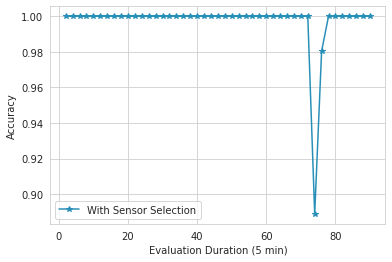

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")

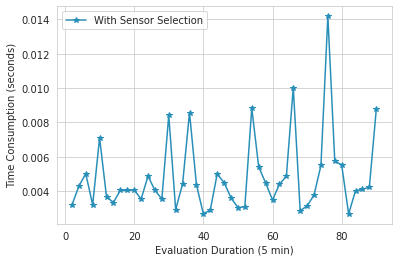

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "With Sensor Selection")

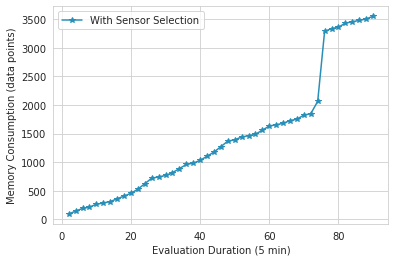

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")

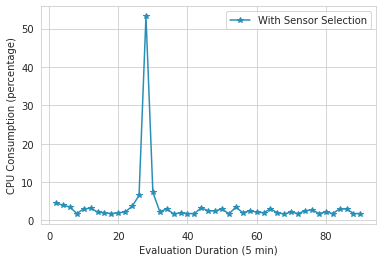

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")

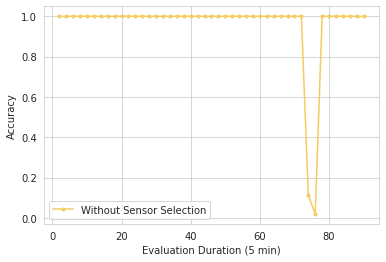

In [ ]:
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")

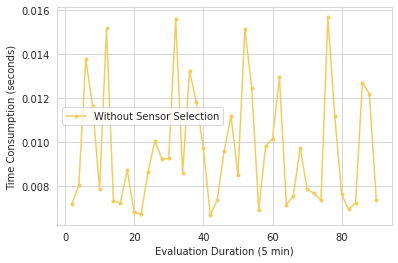

In [ ]:
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "Without Sensor Selection")

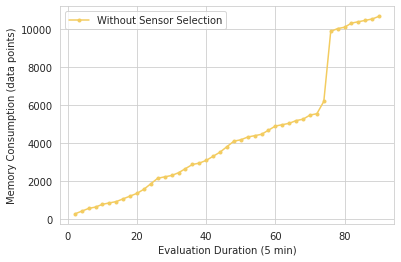

In [ ]:
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")

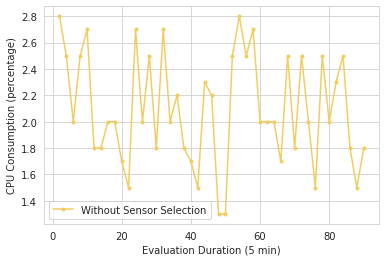

In [ ]:
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")

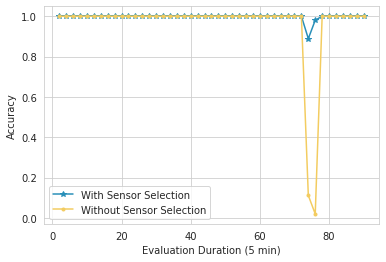

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")
plt.show()

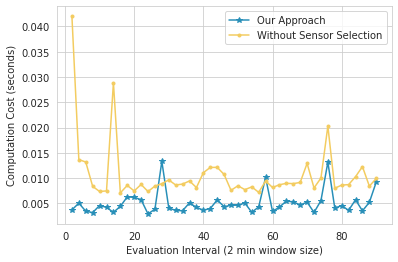

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Our Approach")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

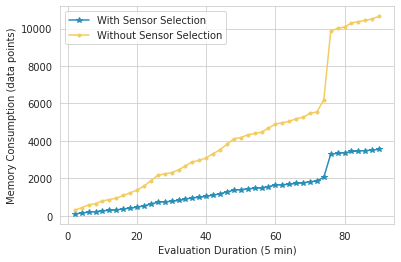

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")
plt.show()

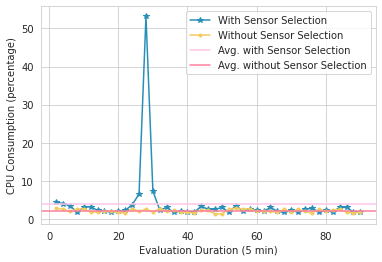

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")
plot_average(cpu_consumption_with_sensor_selection, "#FEC5E5", "Avg. with Sensor Selection")
plot_average(cpu_consumption_without_sensor_selection, "#FE7F9C", "Avg. without Sensor Selection")
plt.show()

Decision Tree Regressor

Train set 2

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

DecisionTreeClassifier()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.001947641372680664
Memory Usage: 96
Score: 1.0
The CPU usage is:  3.0
[INFO] Iteration Number: 1
Time: 0.0017092227935791016
Memory Usage: 144
Score: 1.0
The CPU usage is:  3.5
[INFO] Iteration Number: 2
Time: 0.00353240966796875
Memory Usage: 192
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 3
Time: 0.003474712371826172
Memory Usage: 216
Score: 1.0
The CPU usage is:  1.8
[INFO] Iteration Number: 4
Time: 0.0023696422576904297
Memory Usage: 264
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 5
Time: 0.001978635787963867
Memory Usage: 288
Score: 1.0
The CPU usage is:  3.0
[INFO] Iteration Number: 6
Time: 0.005613565444946289
Memory Usage: 312
Score: 1.0
The CPU usage is:  2.8
[INFO] Iteration Number: 7
Time: 0.0031163692474365234
Memory Usage: 360
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 8
Time: 0.0036797523498535156
Memory Usage: 408
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 9
Time: 0.002176046

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.9970951343500362


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["21_Temp"]
df_compare["humidity"] = sample_df["20_humidity"]
y_compare = sample_df["number of people"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.8368794326241135


In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.00555419921875
Memory Usage: 288
CPU Utlization: 3.0
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.008614540100097656
Memory Usage: 432
CPU Utlization: 3.0
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.007310390472412109
Memory Usage: 576
CPU Utlization: 3.0
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.007584810256958008
Memory Usage: 648
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.009262561798095703
Memory Usage: 792
CPU Utlization: 2.5
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.008028745651245117
Memory Usage: 864
CPU Utlization: 3.0
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.02062392234802246
Memory Usage: 936
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.008353471755981445
Memory Usage: 1080
CPU Utlization: 3.3
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.013235330581665039
Memory Usage: 1224
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.007090568542480469
Memory Usage: 1368
CPU

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.9584604212055194


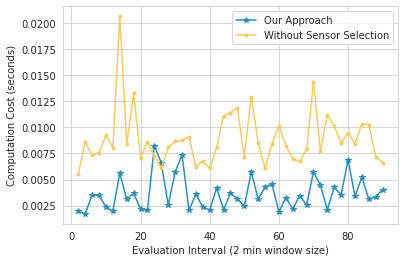

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Our Approach")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

LogisticRegression()

Our Approach

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0025513172149658203
Memory Usage: 96
Score: 0.0
The CPU usage is:  4.5
[INFO] Iteration Number: 1
Time: 0.0022873878479003906
Memory Usage: 144
Score: 1.0
The CPU usage is:  3.5
[INFO] Iteration Number: 2
Time: 0.0023250579833984375
Memory Usage: 192
Score: 1.0
The CPU usage is:  3.5
[INFO] Iteration Number: 3
Time: 0.0025806427001953125
Memory Usage: 216
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 4
Time: 0.002902507781982422
Memory Usage: 264
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 5
Time: 0.0037682056427001953
Memory Usage: 288
Score: 1.0
The CPU usage is:  3.3
[INFO] Iteration Number: 6
Time: 0.002080202102661133
Memory Usage: 312
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 7
Time: 0.003086090087890625
Memory Usage: 360
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 8
Time: 0.0020384788513183594
Memory Usage: 408
Score: 1.0
The CPU usage is:  1.8
[INFO] Iteration Number: 9
Time: 0.002238

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.8859840232389252


TOPSIS

In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["21_Temp"]
df_compare["humidity"] = sample_df["20_humidity"]
y_compare = sample_df["number of people"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.41134751773049644


Without Sensor Selection

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.005390644073486328
Memory Usage: 288
CPU Utlization: 4.5
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.006848573684692383
Memory Usage: 432
CPU Utlization: 2.7
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.009573698043823242
Memory Usage: 576
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.005870819091796875
Memory Usage: 648
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.007204771041870117
Memory Usage: 792
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.0069081783294677734
Memory Usage: 864
CPU Utlization: 3.3
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.010456562042236328
Memory Usage: 936
CPU Utlization: 2.5
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.0062580108642578125
Memory Usage: 1080
CPU Utlization: 2.3
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.0072710514068603516
Memory Usage: 1224
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.007128000259399414
Memory Usage: 

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy with sensor selection: 0.9584604212055194


Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

GaussianNB()

Our Approach

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0021877288818359375
Memory Usage: 96
Score: 1.0
The CPU usage is:  3.5
[INFO] Iteration Number: 1
Time: 0.002802610397338867
Memory Usage: 144
Score: 1.0
The CPU usage is:  3.0
[INFO] Iteration Number: 2
Time: 0.0030508041381835938
Memory Usage: 192
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 3
Time: 0.0032117366790771484
Memory Usage: 216
Score: 1.0
The CPU usage is:  3.3
[INFO] Iteration Number: 4
Time: 0.0021386146545410156
Memory Usage: 264
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 5
Time: 0.0032231807708740234
Memory Usage: 288
Score: 1.0
The CPU usage is:  1.8
[INFO] Iteration Number: 6
Time: 0.003525257110595703
Memory Usage: 312
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 7
Time: 0.003288745880126953
Memory Usage: 360
Score: 1.0
The CPU usage is:  3.8
[INFO] Iteration Number: 8
Time: 0.0027379989624023438
Memory Usage: 408
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 9
Time: 0.004858

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.9526506899055918


TOPSIS

In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["21_Temp"]
df_compare["humidity"] = sample_df["20_humidity"]
y_compare = sample_df["number of people"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.7375886524822695


Without sensor selection

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0076754093170166016
Memory Usage: 288
CPU Utlization: 4.0
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.009631872177124023
Memory Usage: 432
CPU Utlization: 2.3
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.007021427154541016
Memory Usage: 576
CPU Utlization: 2.5
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.007206439971923828
Memory Usage: 648
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.006869077682495117
Memory Usage: 792
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.007846832275390625
Memory Usage: 864
CPU Utlization: 3.3
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.006343364715576172
Memory Usage: 936
CPU Utlization: 3.0
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.006373882293701172
Memory Usage: 1080
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.00603795051574707
Memory Usage: 1224
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.006906032562255859
Memory Usage: 136

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy with sensor selection: 0.9584604212055194


XGBoost

In [ ]:
model = XGBClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

XGBClassifier()

Our Approach

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.0044438838958740234
Memory Usage: 96
Score: 1.0
The CPU usage is:  4.0
[INFO] Iteration Number: 1
Time: 0.004585742950439453
Memory Usage: 144
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 2
Time: 0.0014386177062988281
Memory Usage: 192
Score: 1.0
The CPU usage is:  3.3
[INFO] Iteration Number: 3
Time: 0.007973909378051758
Memory Usage: 216
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 4
Time: 0.0063745975494384766
Memory Usage: 264
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 5
Time: 0.0042722225189208984
Memory Usage: 288
Score: 1.0
The CPU usage is:  2.8
[INFO] Iteration Number: 6
Time: 0.002720355987548828
Memory Usage: 312
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 7
Time: 0.0034079551696777344
Memory Usage: 360
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 8
Time: 0.006848573684692383
Memory Usage: 408
Score: 1.0
The CPU usage is:  3.3
[INFO] Iteration Number: 9
Time: 0.0029370

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.9970951343500362


TOPSIS

In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["21_Temp"]
df_compare["humidity"] = sample_df["20_humidity"]
y_compare = sample_df["number of people"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.8368794326241135


Without Sensor Selection

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.006366252899169922
Memory Usage: 288
CPU Utlization: 4.0
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.0058896541595458984
Memory Usage: 432
CPU Utlization: 2.5
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.007049083709716797
Memory Usage: 576
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.0110321044921875
Memory Usage: 648
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.011956453323364258
Memory Usage: 792
CPU Utlization: 4.0
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.008066654205322266
Memory Usage: 864
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.008898496627807617
Memory Usage: 936
CPU Utlization: 2.8
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.013355255126953125
Memory Usage: 1080
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.010621070861816406
Memory Usage: 1224
CPU Utlization: 2.3
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.011873006820678711
Memory Usage: 1368

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy with sensor selection: 0.9584604212055194


In [ ]:
sample_df

,Time,22_Temp,22_humidity,21_Temp,21_humidity,20_Temp,20_humidity,number of people
44,0 days 11:27:30,28.200001,85.800003,27.5,99.900002,27.900000,1.0,True
62,0 days 11:27:48,28.200001,85.900002,27.5,99.900002,27.900000,1.0,True
89,0 days 11:28:15,28.200001,86.300003,27.6,99.900002,27.900000,1.0,True
93,0 days 11:28:19,28.200001,86.300003,27.6,99.900002,27.900000,1.0,True
232,0 days 11:30:38,28.299999,85.000000,27.6,99.199997,27.900000,1.0,True
...,...,...,...,...,...,...,...,...
5393,0 days 12:56:45,28.200001,86.099998,27.1,99.900002,27.200001,1.0,True
5409,0 days 12:57:01,28.200001,86.300003,27.1,99.900002,27.200001,1.0,True
5470,0 days 12:58:02,28.200001,86.099998,27.0,99.900002,27.200001,1.0,True
5482,0 days 12:58:14,28.200001,86.099998,27.0,99.900002,27.200001,1.0,True


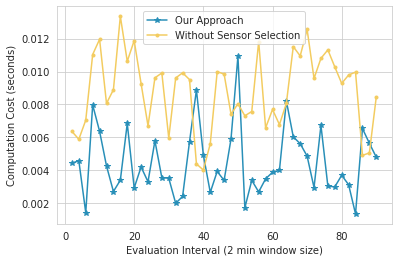

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Our Approach")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

Random Forest Regressor

Train set 2

In [ ]:
model = RandomForestClassifier()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

RandomForestClassifier()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.011618375778198242
Memory Usage: 96
Score: 1.0
The CPU usage is:  3.8
[INFO] Iteration Number: 1
Time: 0.01175832748413086
Memory Usage: 144
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 2
Time: 0.011558294296264648
Memory Usage: 192
Score: 1.0
The CPU usage is:  3.8
[INFO] Iteration Number: 3
Time: 0.022159099578857422
Memory Usage: 216
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 4
Time: 0.021314620971679688
Memory Usage: 264
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 5
Time: 0.019761323928833008
Memory Usage: 288
Score: 1.0
The CPU usage is:  3.7
[INFO] Iteration Number: 6
Time: 0.022609710693359375
Memory Usage: 312
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 7
Time: 0.018139362335205078
Memory Usage: 360
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 8
Time: 0.020308494567871094
Memory Usage: 408
Score: 1.0
The CPU usage is:  3.3
[INFO] Iteration Number: 9
Time: 0.0171999931335

In [ ]:
print(accuracy_with_sensor_selection)

[[1.0, 5], [1.0, 10], [1.0, 15], [1.0, 20], [1.0, 25], [1.0, 30], [0.75, 35], [0.75, 40], [0.75, 45], [1.0, 50], [1.0, 55], [1.0, 60], [0.6666666666666666, 65], [0.6666666666666666, 70], [1.0, 75], [1.0, 80], [1.0, 85], [1.0, 90], [1.0, 95], [0.5, 100], [1.0, 105], [0.75, 110], [1.0, 115], [1.0, 120], [1.0, 125], [0.6666666666666666, 130], [1.0, 135], [1.0, 140], [1.0, 145], [1.0, 150], [1.0, 155], [1.0, 160], [1.0, 165], [1.0, 170], [1.0, 175], [1.0, 180], [1.0, 185]]


In [ ]:
print(time_consumption_with_sensor_selection)

[[0.011934757232666016, 5], [0.016840457916259766, 10], [0.016465425491333008, 15], [0.016440629959106445, 20], [0.01853632926940918, 25], [0.019226551055908203, 30], [0.013533353805541992, 35], [0.017499208450317383, 40], [0.016417503356933594, 45], [0.015268087387084961, 50], [0.011526346206665039, 55], [0.011322736740112305, 60], [0.02126288414001465, 65], [0.01960134506225586, 70], [0.017368078231811523, 75], [0.017984390258789062, 80], [0.013167381286621094, 85], [0.016933679580688477, 90], [0.017001628875732422, 95], [0.01871347427368164, 100], [0.01183009147644043, 105], [0.016596078872680664, 110], [0.020557165145874023, 115], [0.017544031143188477, 120], [0.017467260360717773, 125], [0.01745128631591797, 130], [0.016823768615722656, 135], [0.016396045684814453, 140], [0.016075611114501953, 145], [0.015726804733276367, 150], [0.011582374572753906, 155], [0.01653766632080078, 160], [0.011408805847167969, 165], [0.011201858520507812, 170], [0.011292219161987305, 175], [0.01194334

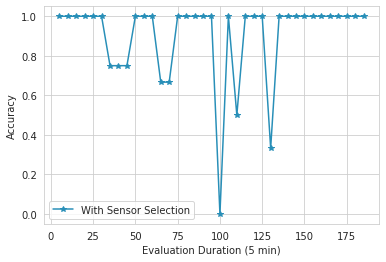

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.9970951343500362


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["21_Temp"]
df_compare["humidity"] = sample_df["20_humidity"]
y_compare = sample_df["number of people"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.8368794326241135


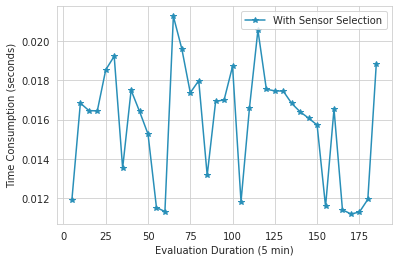

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "With Sensor Selection")

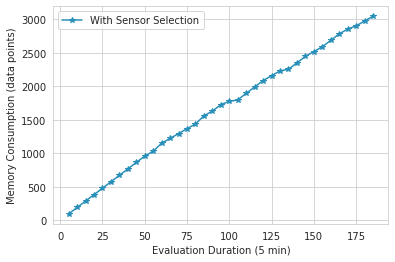

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")

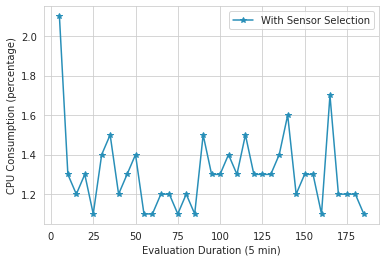

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.016082048416137695
Memory Usage: 288
CPU Utlization: 4.0
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.02291417121887207
Memory Usage: 432
CPU Utlization: 2.8
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.023244142532348633
Memory Usage: 576
CPU Utlization: 2.3
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.023228883743286133
Memory Usage: 648
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.02236008644104004
Memory Usage: 792
CPU Utlization: 2.8
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.024800539016723633
Memory Usage: 864
CPU Utlization: 3.3
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.023656606674194336
Memory Usage: 936
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.02204442024230957
Memory Usage: 1080
CPU Utlization: 3.0
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.024981260299682617
Memory Usage: 1224
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.02242898941040039
Memory Usage: 1368
CP

In [ ]:
print(accuracy_without_sensor_selection)

[[0.5, 5], [1.0, 10], [1.0, 15], [1.0, 20], [1.0, 25], [1.0, 30], [1.0, 35], [1.0, 40], [0.25, 45], [0.0, 50], [0.0, 55], [0.0, 60], [0.0, 65], [0.6666666666666666, 70], [1.0, 75], [1.0, 80], [1.0, 85], [1.0, 90], [1.0, 95], [1.0, 100], [0.0, 105], [0.5, 110], [1.0, 115], [1.0, 120], [0.3333333333333333, 125], [0.3333333333333333, 130], [1.0, 135], [1.0, 140], [1.0, 145], [1.0, 150], [1.0, 155], [1.0, 160], [1.0, 165], [1.0, 170], [1.0, 175], [1.0, 180], [1.0, 185]]


In [ ]:
print(time_consumption_without_sensor_selection)

[[0.020842552185058594, 5], [0.02320551872253418, 10], [0.02406144142150879, 15], [0.019857406616210938, 20], [0.015104293823242188, 25], [0.015932083129882812, 30], [0.01585078239440918, 35], [0.019896745681762695, 40], [0.022391796112060547, 45], [0.024544954299926758, 50], [0.017343759536743164, 55], [0.02261972427368164, 60], [0.02310776710510254, 65], [0.02476358413696289, 70], [0.020177841186523438, 75], [0.023646116256713867, 80], [0.02429819107055664, 85], [0.0222320556640625, 90], [0.02325725555419922, 95], [0.021741867065429688, 100], [0.022134065628051758, 105], [0.02374577522277832, 110], [0.027033090591430664, 115], [0.016622543334960938, 120], [0.021871328353881836, 125], [0.016155481338500977, 130], [0.024091005325317383, 135], [0.021919965744018555, 140], [0.02224898338317871, 145], [0.023363590240478516, 150], [0.02231574058532715, 155], [0.020467758178710938, 160], [0.023626089096069336, 165], [0.022927284240722656, 170], [0.02282857894897461, 175], [0.021755218505859

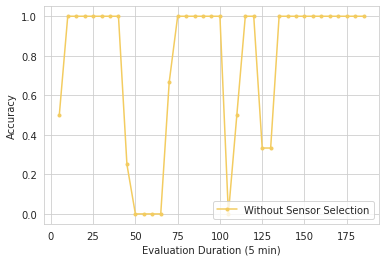

In [ ]:
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.9584604212055194


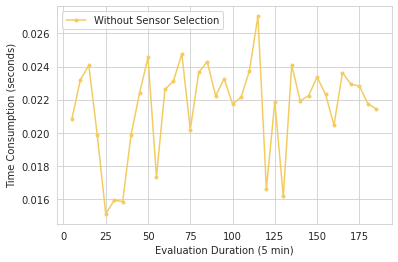

In [ ]:
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "Without Sensor Selection")

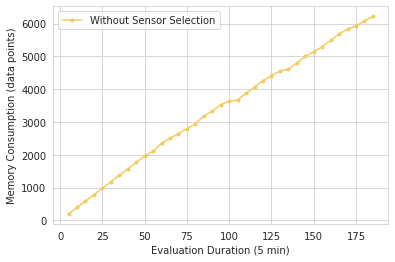

In [ ]:
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")

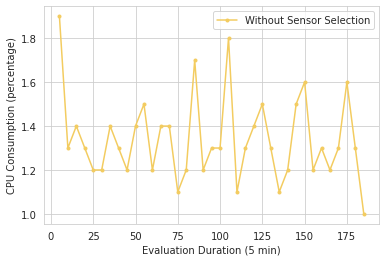

In [ ]:
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_total, time_consumption_without_sensor_selection_total, memory_consumption_without_sensor_selection_total, cpu_consumption_without_sensor_selection_total = machine_learning_without_sensor_selection_individual(start_time, end_time, t, df, RandomForestClassifier(), train_set_2_X, train_set_2_y, 2)

[INFO] Iteration Number: 0
Time: 0.019818544387817383
Memory Usage: 196
CPU Utlization: 3.1
Score: 0.5
[INFO] Iteration Number: 1
Time: 0.02836751937866211
Memory Usage: 392
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.02880573272705078
Memory Usage: 588
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.027419090270996094
Memory Usage: 784
CPU Utlization: 2.1
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.023900985717773438
Memory Usage: 980
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.03251957893371582
Memory Usage: 1176
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.0230100154876709
Memory Usage: 1372
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.026291608810424805
Memory Usage: 1568
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.02074718475341797
Memory Usage: 1764
CPU Utlization: 1.7
Score: 0.5
[INFO] Iteration Number: 9
Time: 0.01651144027709961
Memory Usage: 1960
CPU

In [ ]:
# calculation of accuracy for individual sensors
accuracy_without_sensor_selection_individual_1 = accuracy_without_sensor_selection_total[0][1]
accuracy_without_sensor_selection_individual_2 = accuracy_without_sensor_selection_total[1][1]

Comparison

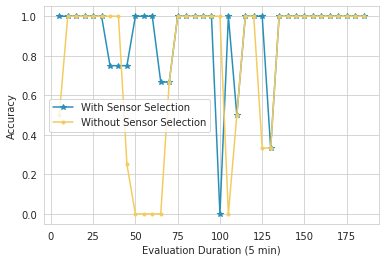

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")
plt.show()

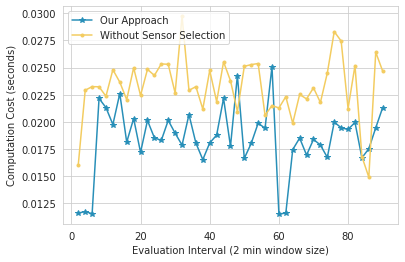

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Our Approach")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

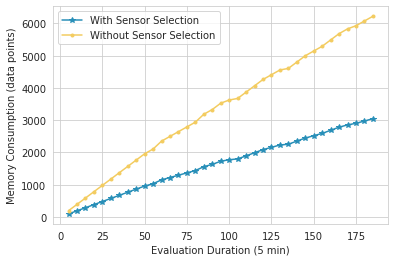

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")
plt.show()

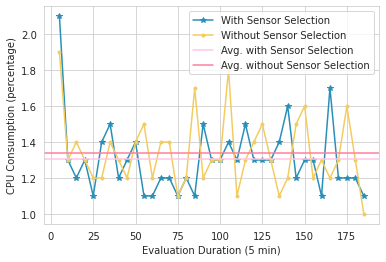

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")
plot_average(cpu_consumption_with_sensor_selection, "#FEC5E5", "Avg. with Sensor Selection")
plot_average(cpu_consumption_without_sensor_selection, "#FE7F9C", "Avg. without Sensor Selection")
plt.show()

In [ ]:
rf_accuracy = two_d_list_to_dataframe(accuracy_with_sensor_selection, accuracy_without_sensor_selection, accuracy_without_sensor_selection_individual_1, accuracy_without_sensor_selection_individual_2, "Interval", "RF_with_sensor_selection", "RF_without_sensor_selection", "RF_without_sensor_selection_sensor_1", "RF_without_sensor_selection_sensor_2")

In [ ]:
print(rf_accuracy)

    Interval  ...  RF_without_sensor_selection_sensor_2
0        5.0  ...                              1.000000
1       10.0  ...                              1.000000
2       15.0  ...                              1.000000
3       20.0  ...                              1.000000
4       25.0  ...                              1.000000
5       30.0  ...                              1.000000
6       35.0  ...                              0.750000
7       40.0  ...                              0.750000
8       45.0  ...                              0.750000
9       50.0  ...                              1.000000
10      55.0  ...                              1.000000
11      60.0  ...                              1.000000
12      65.0  ...                              0.666667
13      70.0  ...                              0.666667
14      75.0  ...                              1.000000
15      80.0  ...                              1.000000
16      85.0  ...                              1

SVM

Train set 2

In [ ]:
model = SVC()
model.fit(train_X_sensor_selection, train_y_sensor_selection)

SVC()

In [ ]:
accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection = machine_learning_with_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.00632786750793457
Memory Usage: 96
Score: 0.0
The CPU usage is:  4.0
[INFO] Iteration Number: 1
Time: 0.003616809844970703
Memory Usage: 144
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 2
Time: 0.0055084228515625
Memory Usage: 192
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 3
Time: 0.006579875946044922
Memory Usage: 216
Score: 1.0
The CPU usage is:  2.3
[INFO] Iteration Number: 4
Time: 0.003125905990600586
Memory Usage: 264
Score: 1.0
The CPU usage is:  2.8
[INFO] Iteration Number: 5
Time: 0.0043506622314453125
Memory Usage: 288
Score: 1.0
The CPU usage is:  2.0
[INFO] Iteration Number: 6
Time: 0.003137350082397461
Memory Usage: 312
Score: 1.0
The CPU usage is:  2.2
[INFO] Iteration Number: 7
Time: 0.00328826904296875
Memory Usage: 360
Score: 1.0
The CPU usage is:  2.5
[INFO] Iteration Number: 8
Time: 0.003703594207763672
Memory Usage: 408
Score: 1.0
The CPU usage is:  2.7
[INFO] Iteration Number: 9
Time: 0.004148721694946

In [ ]:
print(accuracy_with_sensor_selection)

[[0.5, 5], [1.0, 10], [1.0, 15], [1.0, 20], [1.0, 25], [1.0, 30], [1.0, 35], [1.0, 40], [0.25, 45], [0.0, 50], [0.0, 55], [0.0, 60], [0.0, 65], [0.6666666666666666, 70], [1.0, 75], [1.0, 80], [1.0, 85], [1.0, 90], [1.0, 95], [1.0, 100], [0.0, 105], [0.5, 110], [1.0, 115], [1.0, 120], [1.0, 125], [0.6666666666666666, 130], [0.0, 135], [0.0, 140], [0.0, 145], [0.0, 150], [0.0, 155], [0.0, 160], [0.0, 165], [0.0, 170], [0.0, 175], [0.0, 180], [0.0, 185]]


In [ ]:
print(time_consumption_with_sensor_selection)

[[0.0017392635345458984, 5], [0.0017554759979248047, 10], [0.0032491683959960938, 15], [0.003539562225341797, 20], [0.0027434825897216797, 25], [0.0032210350036621094, 30], [0.0032706260681152344, 35], [0.0047342777252197266, 40], [0.002849578857421875, 45], [0.0033049583435058594, 50], [0.005355358123779297, 55], [0.0045299530029296875, 60], [0.004311561584472656, 65], [0.0016994476318359375, 70], [0.00447535514831543, 75], [0.0037164688110351562, 80], [0.002644777297973633, 85], [0.0034945011138916016, 90], [0.003152132034301758, 95], [0.0038094520568847656, 100], [0.0031626224517822266, 105], [0.006508588790893555, 110], [0.002666473388671875, 115], [0.003011941909790039, 120], [0.002974987030029297, 125], [0.0027341842651367188, 130], [0.0040051937103271484, 135], [0.0034532546997070312, 140], [0.0023488998413085938, 145], [0.003091573715209961, 150], [0.003224611282348633, 155], [0.0023207664489746094, 160], [0.003181934356689453, 165], [0.0016970634460449219, 170], [0.00446081161

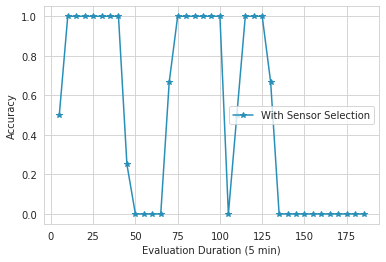

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")

In [ ]:
accuracy_with_sensor_selection_array = np.array(accuracy_with_sensor_selection)
x = accuracy_with_sensor_selection_array[:, 0]
print("Average accuracy with sensor selection:", sum(x)/len(accuracy_with_sensor_selection))

Average accuracy with sensor selection: 0.8859840232389252


In [ ]:
#####EDIT#######
df_compare = pd.DataFrame()
df_compare["temp"] = sample_df["21_Temp"]
df_compare["humidity"] = sample_df["20_humidity"]
y_compare = sample_df["number of people"]

pred = model.predict(df_compare)
print(accuracy_score(y_compare, pred))

0.41134751773049644


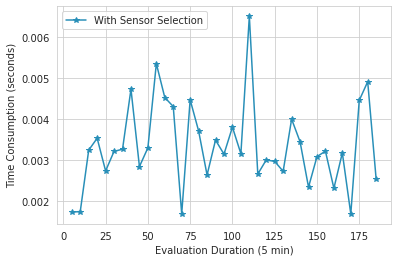

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "With Sensor Selection")

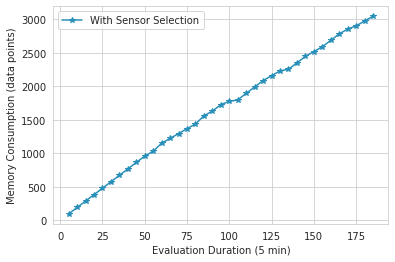

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "With Sensor Selection")

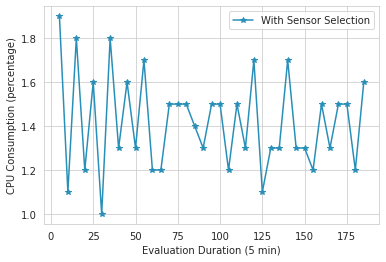

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")

In [ ]:
accuracy_without_sensor_selection, time_consumption_without_sensor_selection, memory_consumption_without_sensor_selection, cpu_consumption_without_sensor_selection = machine_learning_without_sensor_selection(start_time, end_time, t, sample_df, model)

[INFO] Iteration Number: 0
Time: 0.011660337448120117
Memory Usage: 288
CPU Utlization: 3.2
Score: 1.0
[INFO] Iteration Number: 1
Time: 0.007433176040649414
Memory Usage: 432
CPU Utlization: 2.8
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.010678768157958984
Memory Usage: 576
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.007323265075683594
Memory Usage: 648
CPU Utlization: 2.0
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.007184505462646484
Memory Usage: 792
CPU Utlization: 2.3
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.008054256439208984
Memory Usage: 864
CPU Utlization: 2.5
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.0072023868560791016
Memory Usage: 936
CPU Utlization: 3.8
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.007409811019897461
Memory Usage: 1080
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.008206844329833984
Memory Usage: 1224
CPU Utlization: 2.2
Score: 1.0
[INFO] Iteration Number: 9
Time: 0.008354425430297852
Memory Usage: 13

In [ ]:
print(accuracy_without_sensor_selection)

[[0.5, 5], [1.0, 10], [1.0, 15], [1.0, 20], [1.0, 25], [1.0, 30], [1.0, 35], [1.0, 40], [0.25, 45], [0.0, 50], [0.0, 55], [0.0, 60], [0.0, 65], [0.6666666666666666, 70], [1.0, 75], [1.0, 80], [1.0, 85], [1.0, 90], [1.0, 95], [1.0, 100], [0.0, 105], [0.5, 110], [1.0, 115], [1.0, 120], [1.0, 125], [0.6666666666666666, 130], [0.0, 135], [0.0, 140], [0.0, 145], [0.0, 150], [0.0, 155], [0.0, 160], [0.0, 165], [0.0, 170], [0.0, 175], [0.0, 180], [0.0, 185]]


In [ ]:
print(time_consumption_without_sensor_selection)

[[0.007178306579589844, 5], [0.00657343864440918, 10], [0.009919881820678711, 15], [0.009003639221191406, 20], [0.00855708122253418, 25], [0.011421680450439453, 30], [0.009723901748657227, 35], [0.009706735610961914, 40], [0.00775456428527832, 45], [0.008402109146118164, 50], [0.010166406631469727, 55], [0.010881662368774414, 60], [0.009101629257202148, 65], [0.008932113647460938, 70], [0.008405447006225586, 75], [0.010702133178710938, 80], [0.009058475494384766, 85], [0.012066841125488281, 90], [0.009041309356689453, 95], [0.0065424442291259766, 100], [0.006594181060791016, 105], [0.006451129913330078, 110], [0.006565093994140625, 115], [0.008187055587768555, 120], [0.006342411041259766, 125], [0.008616209030151367, 130], [0.008608818054199219, 135], [0.008624553680419922, 140], [0.009766578674316406, 145], [0.010933876037597656, 150], [0.008670330047607422, 155], [0.009385108947753906, 160], [0.00636601448059082, 165], [0.006742715835571289, 170], [0.0063934326171875, 175], [0.006076

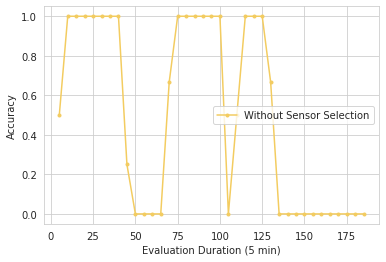

In [ ]:
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_array = np.array(accuracy_without_sensor_selection)
x = accuracy_without_sensor_selection_array[:, 0]
print("Average accuracy without sensor selection:", sum(x)/len(accuracy_without_sensor_selection))

Average accuracy without sensor selection: 0.9584604212055194


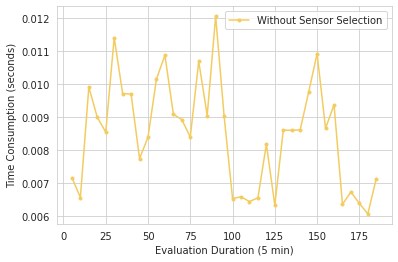

In [ ]:
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Time Consumption (seconds)", "Without Sensor Selection")

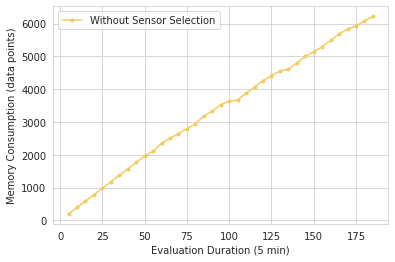

In [ ]:
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (data points)", "Without Sensor Selection")

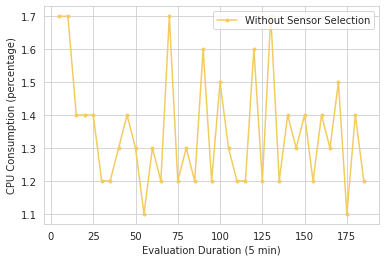

In [ ]:
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")

In [ ]:
accuracy_without_sensor_selection_total, time_consumption_without_sensor_selection_total, memory_consumption_without_sensor_selection_total, cpu_consumption_without_sensor_selection_total = machine_learning_without_sensor_selection_individual(start_time, end_time, t, df, SVC(), train_set_2_X, train_set_2_y, 2)

[INFO] Iteration Number: 0
Time: 0.006643772125244141
Memory Usage: 196
CPU Utlization: 2.9
Score: 0.5
[INFO] Iteration Number: 1
Time: 0.006445646286010742
Memory Usage: 392
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 2
Time: 0.009454965591430664
Memory Usage: 588
CPU Utlization: 1.7
Score: 1.0
[INFO] Iteration Number: 3
Time: 0.011701107025146484
Memory Usage: 784
CPU Utlization: 1.6
Score: 1.0
[INFO] Iteration Number: 4
Time: 0.008820056915283203
Memory Usage: 980
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 5
Time: 0.009299993515014648
Memory Usage: 1176
CPU Utlization: 1.9
Score: 1.0
[INFO] Iteration Number: 6
Time: 0.008557796478271484
Memory Usage: 1372
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 7
Time: 0.011078357696533203
Memory Usage: 1568
CPU Utlization: 1.8
Score: 1.0
[INFO] Iteration Number: 8
Time: 0.010248661041259766
Memory Usage: 1764
CPU Utlization: 1.6
Score: 0.25
[INFO] Iteration Number: 9
Time: 0.009886026382446289
Memory Usage: 

In [ ]:
# calculation of accuracy for individual sensors
accuracy_without_sensor_selection_individual_1 = accuracy_without_sensor_selection_total[0][1]
accuracy_without_sensor_selection_individual_2 = accuracy_without_sensor_selection_total[1][1]

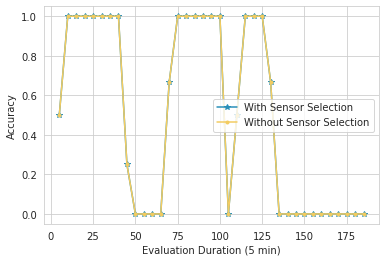

In [ ]:
plot(accuracy_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Accuracy", "With Sensor Selection")
plot(accuracy_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Accuracy", "Without Sensor Selection")
plt.show()

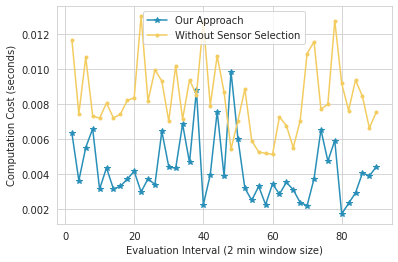

In [ ]:
plot(time_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Our Approach")
plot(time_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Interval (2 min window size)", "Computation Cost (seconds)", "Without Sensor Selection")
plt.show()

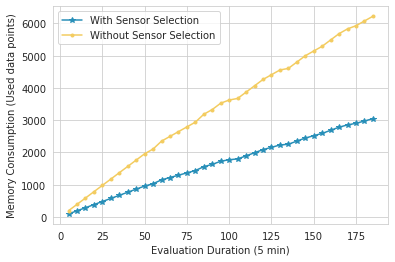

In [ ]:
plot(memory_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "Memory Consumption (Used data points)", "With Sensor Selection")
plot(memory_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "Memory Consumption (Used data points)", "Without Sensor Selection")
plt.show()

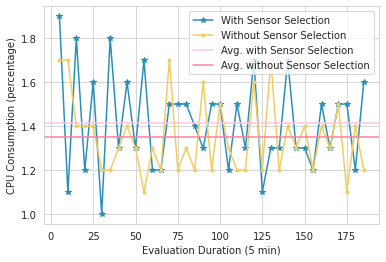

In [ ]:
plot(cpu_consumption_with_sensor_selection, "*", "#288fb8", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "With Sensor Selection")
plot(cpu_consumption_without_sensor_selection, ".", "#f3cc60", "Evaluation Duration (5 min)", "CPU Consumption (percentage)", "Without Sensor Selection")
plot_average(cpu_consumption_with_sensor_selection, "#FEC5E5", "Avg. with Sensor Selection")
plot_average(cpu_consumption_without_sensor_selection, "#FE7F9C", "Avg. without Sensor Selection")
plt.show()

In [ ]:
svc_accuracy = two_d_list_to_dataframe(accuracy_with_sensor_selection, accuracy_without_sensor_selection, accuracy_without_sensor_selection_individual_1, accuracy_without_sensor_selection_individual_2, "Interval", "SVC_with_sensor_selection", "SVC_without_sensor_selection", "SVC_without_sensor_selection_sensor_1", "SVC_without_sensor_selection_2")

In [ ]:
print(svc_accuracy)

    Interval  ...  SVC_without_sensor_selection_2
0        5.0  ...                        0.500000
1       10.0  ...                        1.000000
2       15.0  ...                        1.000000
3       20.0  ...                        1.000000
4       25.0  ...                        1.000000
5       30.0  ...                        1.000000
6       35.0  ...                        1.000000
7       40.0  ...                        1.000000
8       45.0  ...                        0.250000
9       50.0  ...                        0.000000
10      55.0  ...                        0.000000
11      60.0  ...                        0.000000
12      65.0  ...                        0.000000
13      70.0  ...                        0.666667
14      75.0  ...                        1.000000
15      80.0  ...                        1.000000
16      85.0  ...                        1.000000
17      90.0  ...                        1.000000
18      95.0  ...                        1.000000


In [ ]:
accuracy_table = knn_accuracy.merge(dt_accuracy, on = "Interval").merge(rf_accuracy, on = "Interval").merge(svc_accuracy, on = "Interval")

In [ ]:
print(accuracy_table.head())

   Interval  ...  SVC_without_sensor_selection_2
0       5.0  ...                             0.5
1      10.0  ...                             1.0
2      15.0  ...                             1.0
3      20.0  ...                             1.0
4      25.0  ...                             1.0

[5 rows x 17 columns]


In [ ]:
print(accuracy_table.columns)

Index(['Interval', 'KNN_with_sensor_selection', 'KNN_without_sensor_selection',
       'KNN_without_sensor_selection_sensor_1',
       'KNN_without_sensor_selection_sensor_2', 'DT_with_sensor_selection',
       'DT_without_sensor_selection', 'DT_without_sensor_selection_senor_1',
       'DT_without_sensor_selection_sensor_2', 'RF_with_sensor_selection',
       'RF_without_sensor_selection', 'RF_without_sensor_selection_sensor_1',
       'RF_without_sensor_selection_sensor_2', 'SVC_with_sensor_selection',
       'SVC_without_sensor_selection', 'SVC_without_sensor_selection_sensor_1',
       'SVC_without_sensor_selection_2'],
      dtype='object')


In [ ]:
accuracy_table

,Interval,KNN_with_sensor_selection,KNN_without_sensor_selection,KNN_without_sensor_selection_sensor_1,KNN_without_sensor_selection_sensor_2,DT_with_sensor_selection,DT_without_sensor_selection,DT_without_sensor_selection_senor_1,DT_without_sensor_selection_sensor_2,RF_with_sensor_selection,RF_without_sensor_selection,RF_without_sensor_selection_sensor_1,RF_without_sensor_selection_sensor_2,SVC_with_sensor_selection,SVC_without_sensor_selection,SVC_without_sensor_selection_sensor_1,SVC_without_sensor_selection_2
0,5.0,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,0.500000,1.000000,0.500000,0.500000,0.500000,0.500000
1,10.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,15.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,20.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,25.0,1.000000,0.750000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,30.0,1.000000,0.500000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,35.0,0.500000,0.000000,1.000000,0.500000,1.000000,0.250000,1.000000,1.000000,0.750000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000
7,40.0,0.250000,0.250000,1.000000,0.250000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000
8,45.0,0.500000,0.250000,0.250000,0.500000,0.750000,0.000000,0.750000,0.750000,0.750000,0.250000,0.500000,0.750000,0.250000,0.250000,0.250000,0.250000
9,50.0,1.000000,1.000000,0.000000,1.000000,0.750000,0.750000,0.000000,0.750000,1.000000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print(accuracy_table.columns)

Index(['Interval', 'KNN_with_sensor_selection', 'KNN_without_sensor_selection',
       'KNN_without_sensor_selection_sensor_1',
       'KNN_without_sensor_selection_sensor_2', 'DT_with_sensor_selection',
       'DT_without_sensor_selection', 'DT_without_sensor_selection_senor_1',
       'DT_without_sensor_selection_sensor_2', 'RF_with_sensor_selection',
       'RF_without_sensor_selection', 'RF_without_sensor_selection_sensor_1',
       'RF_without_sensor_selection_sensor_2', 'SVC_with_sensor_selection',
       'SVC_without_sensor_selection', 'SVC_without_sensor_selection_sensor_1',
       'SVC_without_sensor_selection_2'],
      dtype='object')


In [ ]:
print("KNN With Sensor Selection:", accuracy_table["KNN_with_sensor_selection"].mean())
print("KNN Without Sensor Selection:", accuracy_table["KNN_without_sensor_selection"].mean())
print("KNN Without Sensor Selection Sensor-1", accuracy_table["KNN_without_sensor_selection_sensor_1"].mean())
print("KNN Without Sensor Selection Sensor-2", accuracy_table["KNN_without_sensor_selection_sensor_2"].mean())

print("DT With Sensor Selection:", accuracy_table["DT_with_sensor_selection"].mean())
print("DT Without Sensor Selection:", accuracy_table["DT_without_sensor_selection"].mean())
print("DT Without Sensor Selection Sensor-1", accuracy_table["DT_without_sensor_selection_senor_1"].mean())
print("DT Without Sensor Selection Sensor-2", accuracy_table["DT_without_sensor_selection_sensor_2"].mean())

print("RF With Sensor Selection:", accuracy_table["RF_with_sensor_selection"].mean())
print("RF Without Sensor Selection:", accuracy_table["RF_without_sensor_selection"].mean())
print("RF Without Sensor Selection Sensor-1", accuracy_table["RF_without_sensor_selection_sensor_1"].mean())
print("RF Without Sensor Selection Sensor-2", accuracy_table["RF_without_sensor_selection_sensor_2"].mean())

print("SVC With Sensor Selection:", accuracy_table["SVC_with_sensor_selection"].mean())
print("SVC Without Sensor Selection:", accuracy_table["SVC_without_sensor_selection"].mean())
print("SVC Without Sensor Selection Sensor-1", accuracy_table["SVC_without_sensor_selection_sensor_1"].mean())
print("SVC Without Sensor Selection Sensor-2", accuracy_table["SVC_without_sensor_selection_2"].mean())

KNN With Sensor Selection: 0.9054054054054054
KNN Without Sensor Selection: 0.7301801801801803
KNN Without Sensor Selection Sensor-1 0.44009009009009004
KNN Without Sensor Selection Sensor-2 0.9054054054054054
DT With Sensor Selection: 0.9504504504504506
DT Without Sensor Selection: 0.745045045045045
DT Without Sensor Selection Sensor-1 0.7121621621621622
DT Without Sensor Selection Sensor-2 0.9504504504504506
RF With Sensor Selection: 0.9504504504504506
RF Without Sensor Selection: 0.8198198198198199
RF Without Sensor Selection Sensor-1 0.7567567567567567
RF Without Sensor Selection Sensor-2 0.9527027027027027
SVC With Sensor Selection: 0.5022522522522522
SVC Without Sensor Selection: 0.5022522522522522
SVC Without Sensor Selection Sensor-1 0.5022522522522522
SVC Without Sensor Selection Sensor-2 0.5022522522522522


In [ ]:
accuracy_dataframe = pd.DataFrame({
    "Machine Learning Model" : ["K Nearest Neighbors Classifier", "Decision Tree Classifier", "XGBoost Classifier"],
    "Our Approach" : [99.71, 99.71, 99.71],
    "TOPSIS": [83.69, 83.69, 83.69],
    "Dynamic Skyline" : [83.69, 83.69, 83.69],
    "Without Sensor Selection" : [95.85, 95.85, 95.85]
})

In [ ]:
accuracy_dataframe

,Machine Learning Model,Our Approach,TOPSIS,Dynamic Skyline,Without Sensor Selection
0,K Nearest Neighbors Classifier,99.71,83.69,83.69,95.85
1,Decision Tree Classifier,99.71,83.69,83.69,95.85
2,XGBoost Classifier,99.71,83.69,83.69,95.85


In [ ]:
accuracy_dataframe = pd.DataFrame({
    "Machine Learning Model" : ["K Nearest Neighbors Classifier", "Decision Tree Classifier", "Random Forest Classifier", "SVM Classifier", "Logistic Regression", "Naive Bayes", "XGBoost"],
    "Our Approach" : [85.36, 93.02, 93.24, 50.23, 70.95, 69.59, 91.66],
    "TOPSIS": [67.44, 68.22, 77.25, 50.23, 52.71, 61.24, 72.86],
    "Without Sensor Selection":[76.35, 72.48, 72.88, 52.72, 64.86, 66.89, 76.35]
})

In [ ]:
accuracy_dataframe

,Machine Learning Model,Our Approach,TOPSIS,Without Sensor Selection
0,K Nearest Neighbors Classifier,85.36,67.44,76.35
1,Decision Tree Classifier,93.02,68.22,72.48
2,Random Forest Classifier,93.24,77.25,72.88
3,SVM Classifier,50.23,50.23,52.72
4,Logistic Regression,70.95,52.71,64.86
5,Naive Bayes,69.59,61.24,66.89
6,XGBoost,91.66,72.86,76.35


In [ ]:
df

,Time,33_temp,33_humidity,33_m2,33_m1,30_temp,30_humidity,30_m2,30_m1,number of people
0,0 days 15:47:02,24.400000,99.800003,0.0,0.0,24.100000,94.099998,0,0,True
1,0 days 15:48:41,24.500000,99.900002,0.0,1.0,24.200001,95.400002,1,0,True
2,0 days 15:50:19,24.600000,99.900002,0.0,0.0,24.500000,95.800003,0,0,False
3,0 days 15:51:28,24.700001,99.900002,0.0,0.0,24.600000,95.099998,0,0,False
4,0 days 15:52:45,24.799999,99.900002,1.0,0.0,24.500000,93.800003,0,1,False
...,...,...,...,...,...,...,...,...,...,...
126,0 days 18:47:19,26.299999,99.900002,1.0,1.0,25.700001,96.500000,0,1,True
127,0 days 18:48:39,26.299999,99.900002,0.0,1.0,25.700001,96.400002,1,1,True
128,0 days 18:50:28,26.299999,99.900002,1.0,1.0,25.799999,96.000000,1,1,True
129,0 days 18:52:10,26.400000,99.900002,1.0,1.0,25.799999,96.199997,0,0,True


Comparison Approach

In [ ]:
#calculation of attributes: accuracy
def accuracy_attr(df, sensor, threshold=0.1):
  start = start_time
  window = datetime.timedelta(hours = 1, minutes = 0, seconds = 0)
  end = start_time + window

  df_ = df.loc[(df["Time"] >= start) & (df["Time"] < end)]
  mean = np.mean(df_[sensor])
  sensor_value = np.array(df_[sensor])
  correct_incorrect = sensor_value - mean
  correct = (correct_incorrect <= threshold).sum()
  acc_atr = correct/sensor_value.shape[0]

  #print(acc_atr)
  return acc_atr

In [ ]:
#calculation of attribyes: reliability
def reliability_attr(df, sensor):

  start = start_time
  window = datetime.timedelta(hours = 1, minutes = 0, seconds = 0)
  end = start_time + window

  df_ = df.loc[(df["Time"] >= start) & (df["Time"] < end)]

  #print(df_.shape[0])
  return df_.shape[0]

In [ ]:
#calculating attrs
#c1 -> accuracy
#c2 -> reliability

#for temperature
a11 = accuracy_attr(df, "22_Temp")   #acc 22
a12 = reliability_attr(df, "22_Temp") #reliability 22

a21 = accuracy_attr(df, "21_Temp")   #acc 21
a22 = reliability_attr(df, "21_Temp") #reliability 21

a31 = accuracy_attr(df, "20_Temp")   #acc 20
a32 = reliability_attr(df, "20_Temp") #reliability 20

print(a11, a12)
print(a21, a22)
print(a31, a32)

#for humidity
a11 = accuracy_attr(df, "22_humidity")   #acc 22
a12 = reliability_attr(df, "22_humidity") #reliability 22

a21 = accuracy_attr(df, "21_humidity")   #acc 21
a22 = reliability_attr(df, "21_humidity") #reliability 21

a31 = accuracy_attr(df, "20_humidity")   #acc 20
a32 = reliability_attr(df, "20_humidity") #reliability 20

print(a11, a12)
print(a21, a22)
print(a31, a32)

0.65625 64
0.859375 64
0.5625 64
0.515625 64
0.484375 64
1.0 64


In [ ]:
#topsis algorithm
def topsis_algorithm(decision_matrix_A):
  """
  rows: correspond to the homogeneous sensors
  columns: correspond to sensor attributes
  """

  l, c = decision_matrix_A.shape    #l: number of rows; c: number of columns

  print("Decision Matrix:", decision_matrix_A)  #for debugging purposes

  #step1: normalize the matrix A to A' according to the following equation 1:
  for attribute in range(c):
    normalization_factor = np.sqrt(np.square(decision_matrix_A[:,attribute]).sum())
    decision_matrix_A[:,attribute] = decision_matrix_A[:,attribute]/normalization_factor
  
  print("Normalized Decision Matrix:", decision_matrix_A)   #for debugging purposes

  #step2: each sensor attribute's minimum values and maximum values in matric A' are calculated to get the 
  #optimal point and the worst point
  a_plusj = np.max(decision_matrix_A, axis=0)
  a_minusj = np.min(decision_matrix_A, axis=0)

  print("a_+j:", a_plusj)   #for debugging purposes
  print("a_-j:", a_minusj)  #for debugging purposes

  #step3: euclidean distance of every sensor option to a_plusj and a_minusj are computed and represented by:
  euclidean_distance = np.zeros((l, 2))
  for sensor in range(l):
    euclidean_distance[sensor][0] = np.sqrt(np.square(decision_matrix_A[sensor, :] - a_plusj).sum())
    euclidean_distance[sensor][1] = np.sqrt(np.square(decision_matrix_A[sensor, :] - a_minusj).sum())
  
  print("Euclidean Distance:", euclidean_distance)    #for debugging purposes

  #step4: set a measurement index to characterize and sort each sensor option according to the computed value.
  measurement_index = [ ]
  for sensor in range(l):
    measurement_index.append(euclidean_distance[sensor][1]/(euclidean_distance[sensor][0] + euclidean_distance[sensor][1]))

  print("Measurement Index:", measurement_index)  #for debugging purposes

  print("sensor selected:", measurement_index.index(min(measurement_index)))


In [ ]:
matrix = np.array([[-0.6707317073170732, 82], [-0.8414634146341463, 82], [-0.5487804878048781, 82]], dtype=float)
topsis_algorithm(matrix)

Decision Matrix: [[-0.67073171 82.        ]
 [-0.84146341 82.        ]
 [-0.54878049 82.        ]]
Normalized Decision Matrix: [[-0.55527235  0.57735027]
 [-0.69661441  0.57735027]
 [-0.45431374  0.57735027]]
a_+j: [-0.45431374  0.57735027]
a_-j: [-0.69661441  0.57735027]
Euclidean Distance: [[0.10095861 0.14134205]
 [0.24230066 0.        ]
 [0.         0.24230066]]
Measurement Index: [0.5833333333333333, 0.0, 1.0]
sensor selected: 1


In [ ]:
matrix = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
matrix

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [ ]:
matrix[:, 0]/5.0990195135927845

array([0.19611614, 0.98058068])

In [ ]:
def machine_learning_with_sensor_selection_modif(start_time, end_time, t, df, model, X_train_mean, y_train_mean, sensor_selected):

  model.fit(X_train_mean, y_train_mean)

  #with sensor selection
  df_compare = pd.DataFrame()

  df_compare["temp"] = df[sensor_selected[0]] #0 would be temp
  df_compare["humidity"] = df[sensor_selected[1]] #1 would be humidity
  y_compare = df["number of people"]

  memory_consumption_with_sensor_selection = df_compare.memory_usage(index=True).sum()

  start_time_estimate = time.time()
  prediction_with_sensor_selection = model.predict(df_compare)
  score_with_sensor_selection = accuracy_score(y_compare, prediction_with_sensor_selection)
  end_time_estimate = time.time()

  estimate = end_time_estimate - start_time_estimate 

  cpu_consumption_with_sensor_selection = psutil.cpu_percent(5)

  accuracy_with_sensor_selection = score_with_sensor_selection
  time_consumption_with_sensor_selection = estimate

  return accuracy_with_sensor_selection, time_consumption_with_sensor_selection, memory_consumption_with_sensor_selection, cpu_consumption_with_sensor_selection